In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob, iglob
import seaborn as sns

In [43]:
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['legend.markerscale'] = 2
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['figure.dpi'] = 100

sns.set_style('ticks')
sns.set_palette('deep')

# Look at some basic qc information about the experiments

In [3]:
qcs = np.array(glob('other_cells_methods/*/qc_metrics/*.txt'), dtype=str)
qcs.sort()
qcs = qcs.reshape((10, 8))

In [4]:
dfs = []
for qc in qcs:
    df = []
    for q in qc:
        df.append(pd.read_table(q, index_col=0))
    tmp = pd.concat(df, axis=1)
    dfs.append(tmp)

sample_info = pd.concat(dfs)
sample_info.head(2)

,dup_level,frac_open,frip,library_size,mapping_rate,mt_content,sequencing_depth,uniq_frags
cell,,,,,,,,
c1_K562_chip1_01,0.924489,0.042205,0.517288,7693.0,94.01,0.620694,123268,2918.0
c1_K562_chip1_02,0.937314,0.444229,0.123374,50363.0,95.61,0.058714,904702,47406.0


In [5]:
sample_info['batch'] = sample_info.index.str.extract('(.*)_[0-9]+', expand=False)

Text(4.44444,0.5,'Overall alignment rate%')

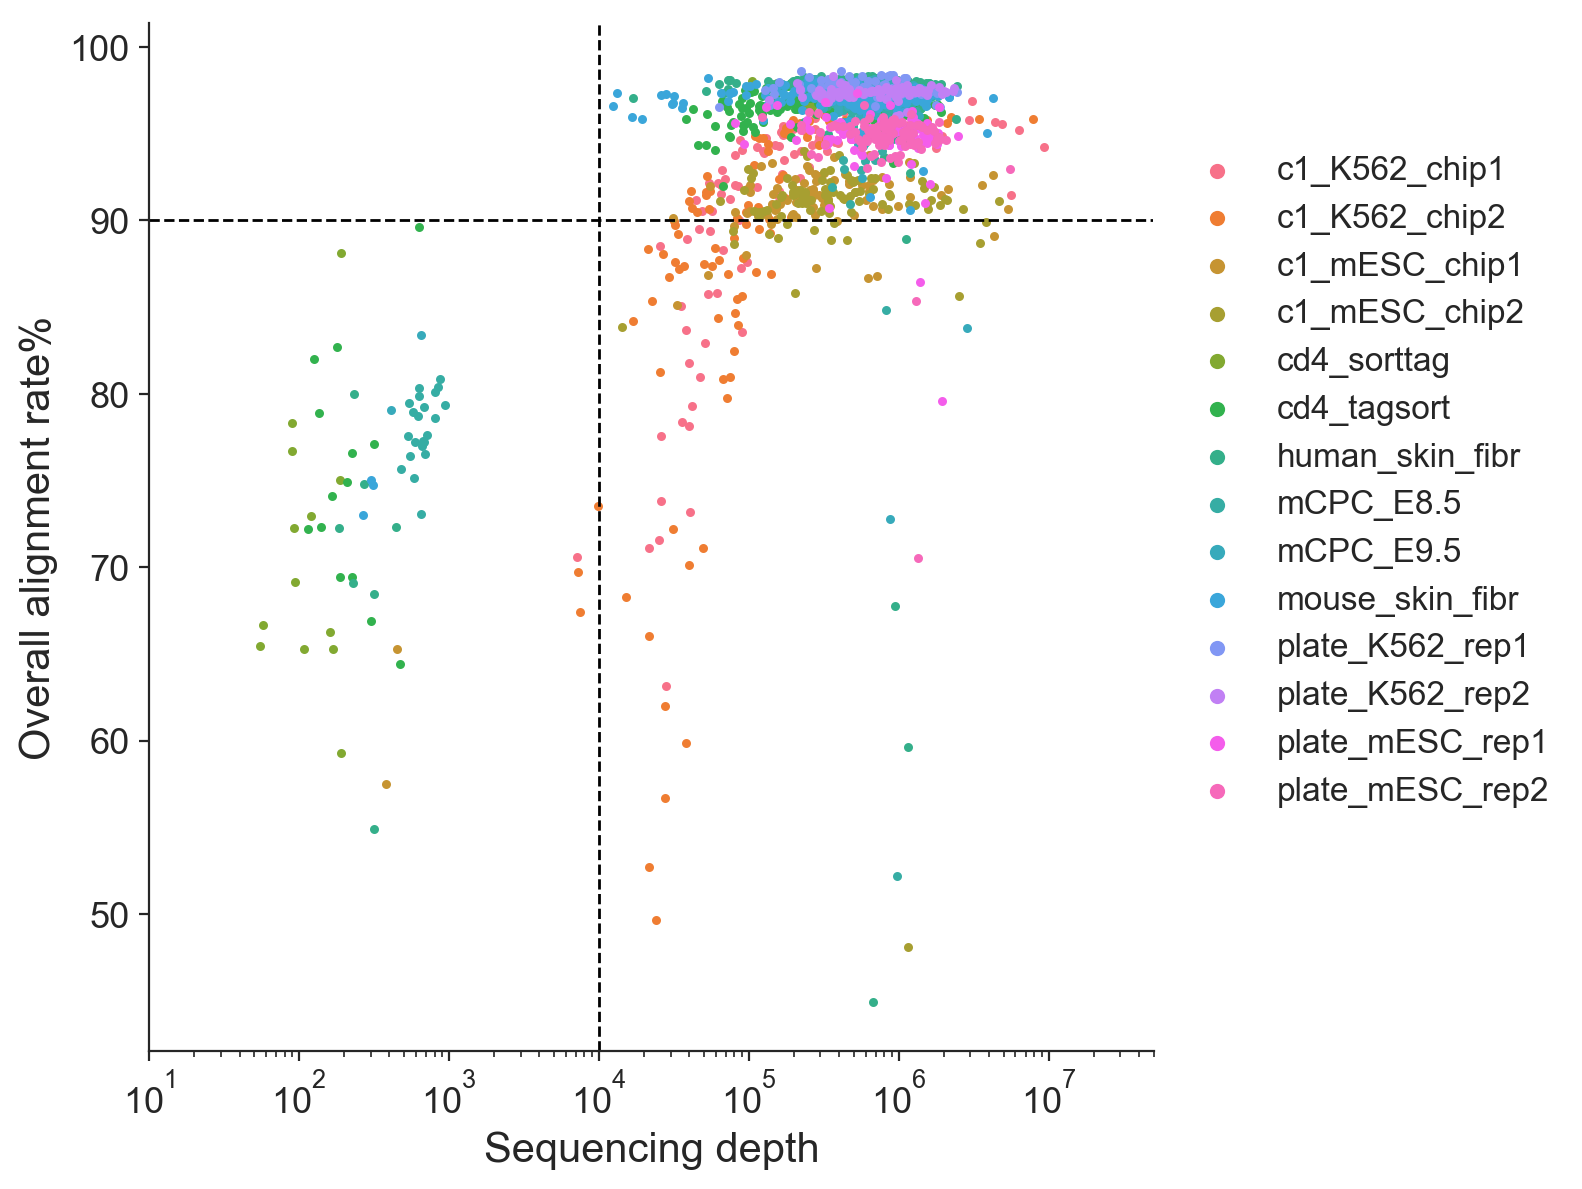

In [6]:
g = sns.FacetGrid(sample_info, hue='batch', height=6)
g.map(plt.scatter, 'sequencing_depth', 'mapping_rate', s=5)
g.ax.set_xscale('log')
g.ax.set_xlim(10, 5e7)

g.ax.legend(bbox_to_anchor=[1, .9], frameon=False)
g.ax.axhline(y=90, xmin=0, xmax=1, ls='dashed', c='k', lw=1.)
g.ax.axvline(x=1e4, ymin=0, ymax=1, ls='dashed', c='k', lw=1.)

g.ax.set_xlabel('Sequencing depth')
g.ax.set_ylabel('Overall alignment rate%')

In [7]:
all_median = sample_info.groupby('batch').median()
all_median

,dup_level,frac_open,frip,library_size,mapping_rate,mt_content,sequencing_depth,uniq_frags
batch,,,,,,,,
c1_K562_chip1,0.943457,0.050603,0.348685,6792.0,93.840,0.391514,157847.5,3264.0
c1_K562_chip2,0.946277,0.023363,0.305319,3109.0,90.135,0.329722,83739.5,1888.5
c1_mESC_chip1,0.895222,0.111854,0.227012,23183.5,91.310,0.069826,272739.0,20735.0
c1_mESC_chip2,0.901824,0.110492,0.184076,25154.5,91.215,0.047815,339823.0,22795.5
cd4_sorttag,0.959504,0.264682,0.712929,25830.0,97.365,0.016639,682727.5,25056.5
cd4_tagsort,0.952881,0.299732,0.689794,30953.0,96.690,0.015206,718120.5,30368.5
human_skin_fibr,0.875312,0.219900,0.601531,60458.5,97.870,0.016715,533802.5,59068.0
mCPC_E8.5,0.836070,0.261021,0.520305,104608.5,97.210,0.123606,739965.5,92276.0
mCPC_E9.5,0.852577,0.251955,0.526268,88776.0,97.390,0.129297,688425.5,77785.0


# Have a look at the comparison between c1 and plate

In [11]:
cmp_idx = (sample_info.index.str.startswith('c1') | sample_info.index.str.startswith('plate'))
t4_idx = sample_info.index.str.startswith('cd4').copy()
compare = sample_info.loc[cmp_idx,].copy()
others = sample_info.loc[np.logical_not(cmp_idx|t4_idx),].copy()

compare.replace({'batch' : {'c1_K562_chip1' : 'K562 C1 rep1 (n=96)',
                            'c1_K562_chip2' : 'K562 C1 rep2 (n=96)',
                            'c1_mESC_chip1' : 'mESC C1 rep1 (n=96)',
                            'c1_mESC_chip2' : 'mESC C1 rep2 (n=96)',
                            'plate_K562_rep1' : 'K562 plate rep1 (n=96)',
                            'plate_K562_rep2' : 'K562 plate rep2 (n=96)',
                            'plate_mESC_rep1' : 'mESC plate rep1 (n=96)',
                            'plate_mESC_rep2' : 'mESC plate rep2 (n=96)'}},
                inplace=True)

In [12]:
c1_plate_median = compare.groupby('batch').median()
c1_plate_median

,dup_level,frac_open,frip,library_size,mapping_rate,mt_content,sequencing_depth,uniq_frags
batch,,,,,,,,
K562 C1 rep1 (n=96),0.943457,0.050603,0.348685,6792.0,93.840,0.391514,157847.5,3264.0
K562 C1 rep2 (n=96),0.946277,0.023363,0.305319,3109.0,90.135,0.329722,83739.5,1888.5
K562 plate rep1 (n=96),0.972131,0.132162,0.499907,14980.0,97.510,0.179726,599234.5,10555.5
K562 plate rep2 (n=96),0.942184,0.307729,0.436482,42245.0,97.390,0.061254,848197.5,38019.5
mESC C1 rep1 (n=96),0.895222,0.111854,0.227012,23183.5,91.310,0.069826,272739.0,20735.0
mESC C1 rep2 (n=96),0.901824,0.110492,0.184076,25154.5,91.215,0.047815,339823.0,22795.5
mESC plate rep1 (n=96),0.943482,0.201884,0.421075,38714.5,95.040,0.051184,829274.5,37250.0
mESC plate rep2 (n=96),0.945561,0.219249,0.415647,39956.0,95.030,0.053550,823307.5,37506.5


In [14]:
order1 = ['K562 C1 rep1 (n=96)', 'K562 C1 rep2 (n=96)',
          'mESC C1 rep1 (n=96)', 'mESC C1 rep2 (n=96)',
          'K562 plate rep1 (n=96)', 'K562 plate rep2 (n=96)',
          'mESC plate rep1 (n=96)', 'mESC plate rep2 (n=96)']
order2 = ['human_skin_fibr', 'mouse_skin_fibr', 'mCPC_E8.5', 'mCPC_E9.5']

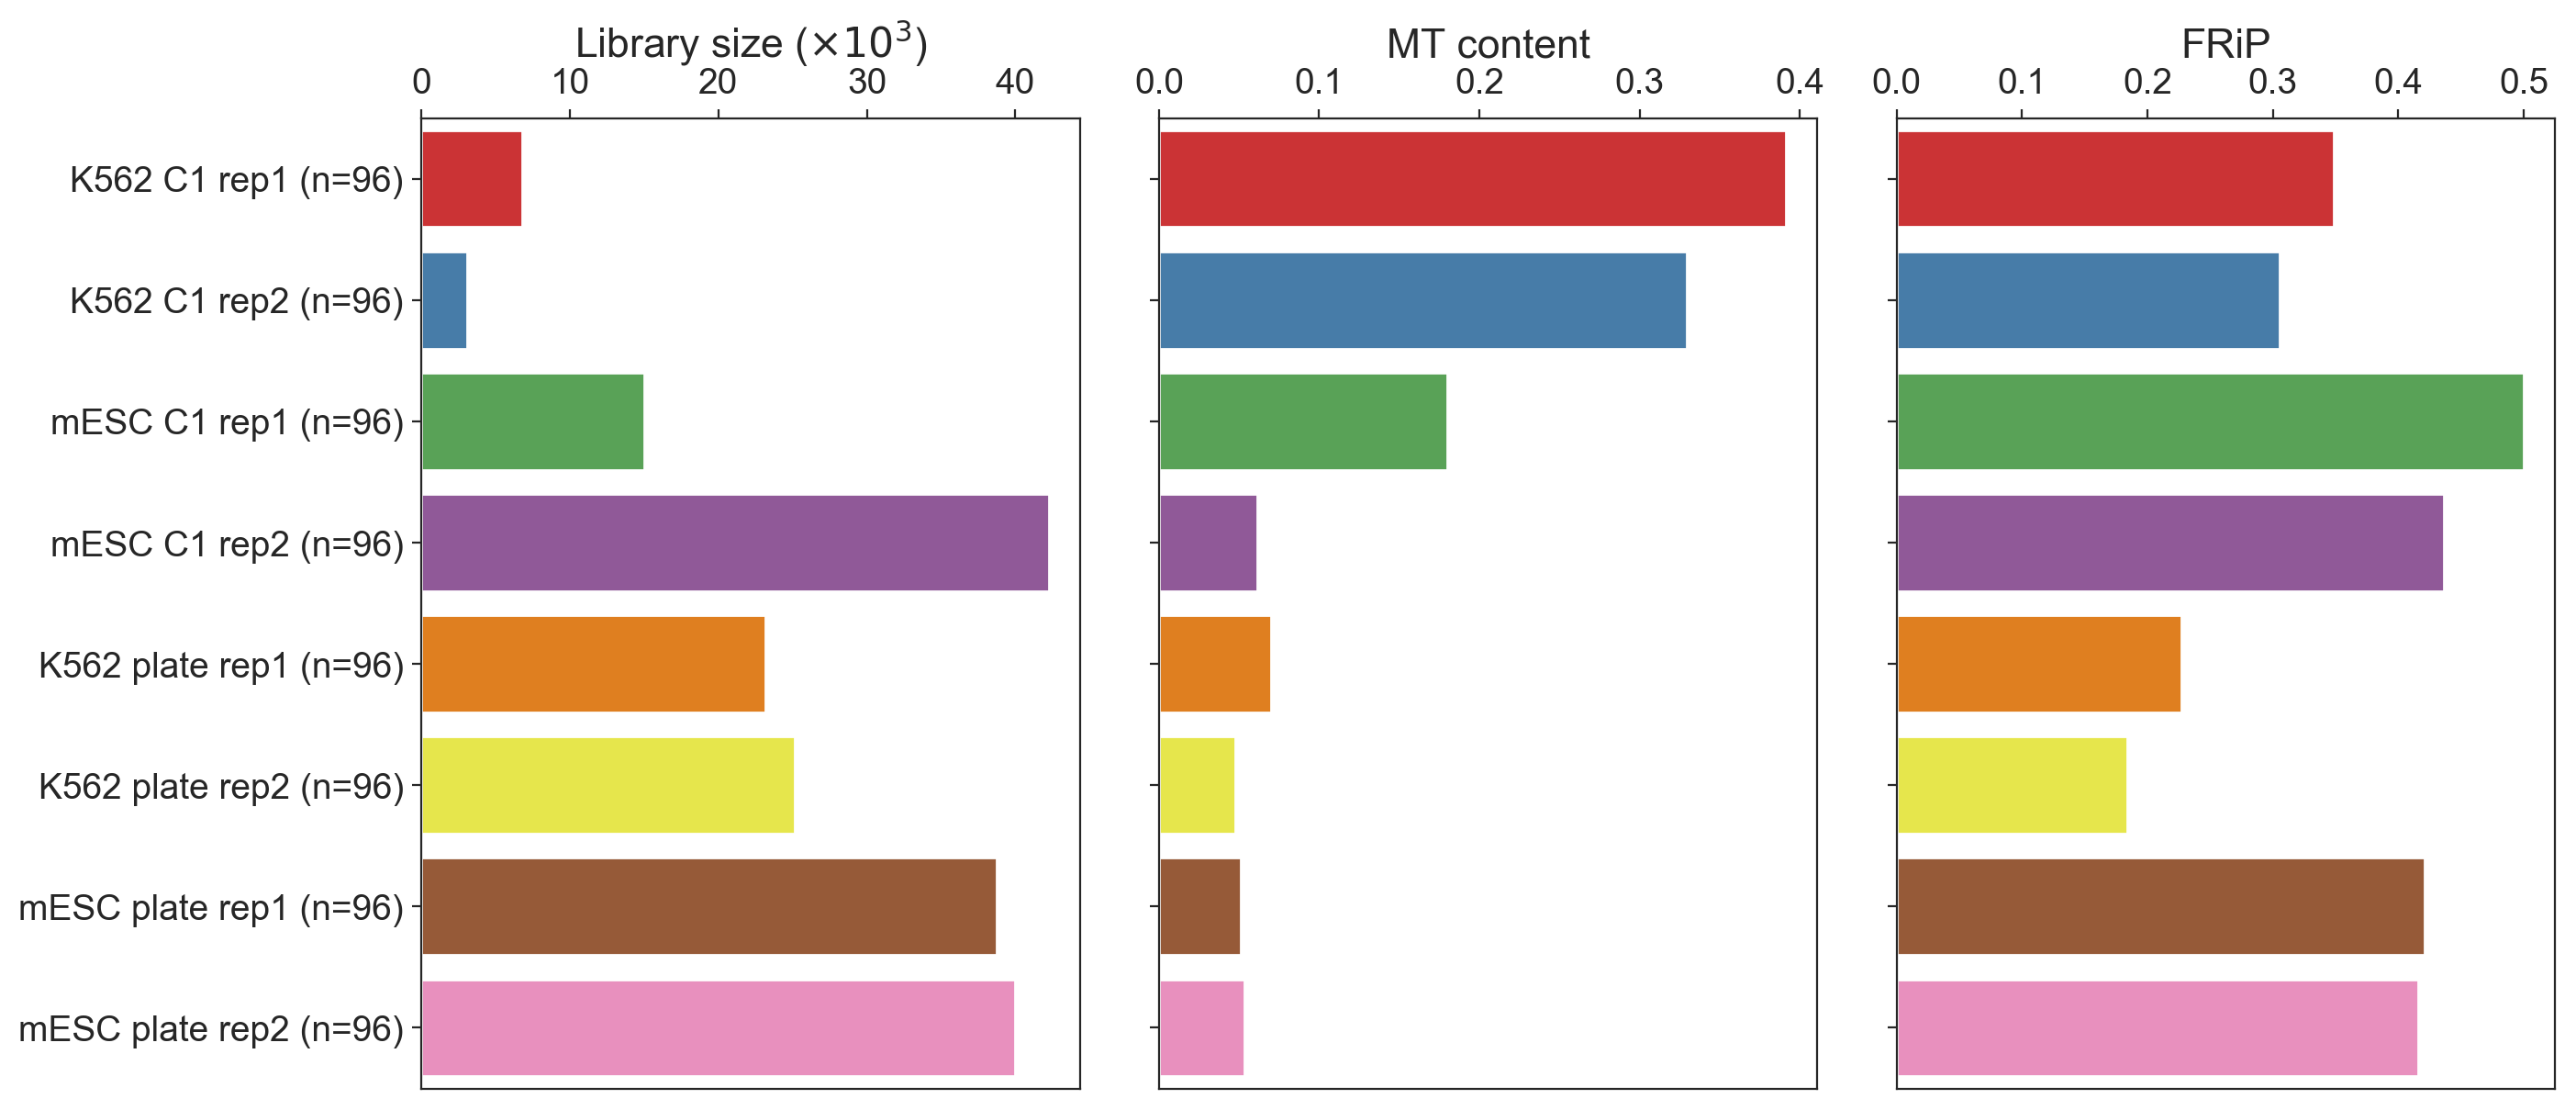

In [48]:
fig, ax = plt.subplots(figsize=(15, 7), ncols=3, nrows=1,
                       sharey=True, gridspec_kw={'wspace' : 0.12})

for i,j,k in zip(['library_size', 'mt_content', 'frip'],
                 ax,
                 [r'Library size ($\times 10^3$)', 'MT content', 'FRiP']):
    sns.barplot(y=order1, x=i, data=c1_plate_median,
                palette="Set1", ax=j, orient='h')
    j.xaxis.set_ticks_position('top')
    j.xaxis.set_label_position('top')
    j.set_xlabel(k)

ax[0].set_xticks([0, 1e4, 2e4, 3e4, 4e4])
ax[0].set_xticklabels(['0', '10', '20', '30', '40'])
plt.savefig('figures/c1_vs_plate_side_by_side_bar.pdf',
            bbox_inches='tight', transparent=True)

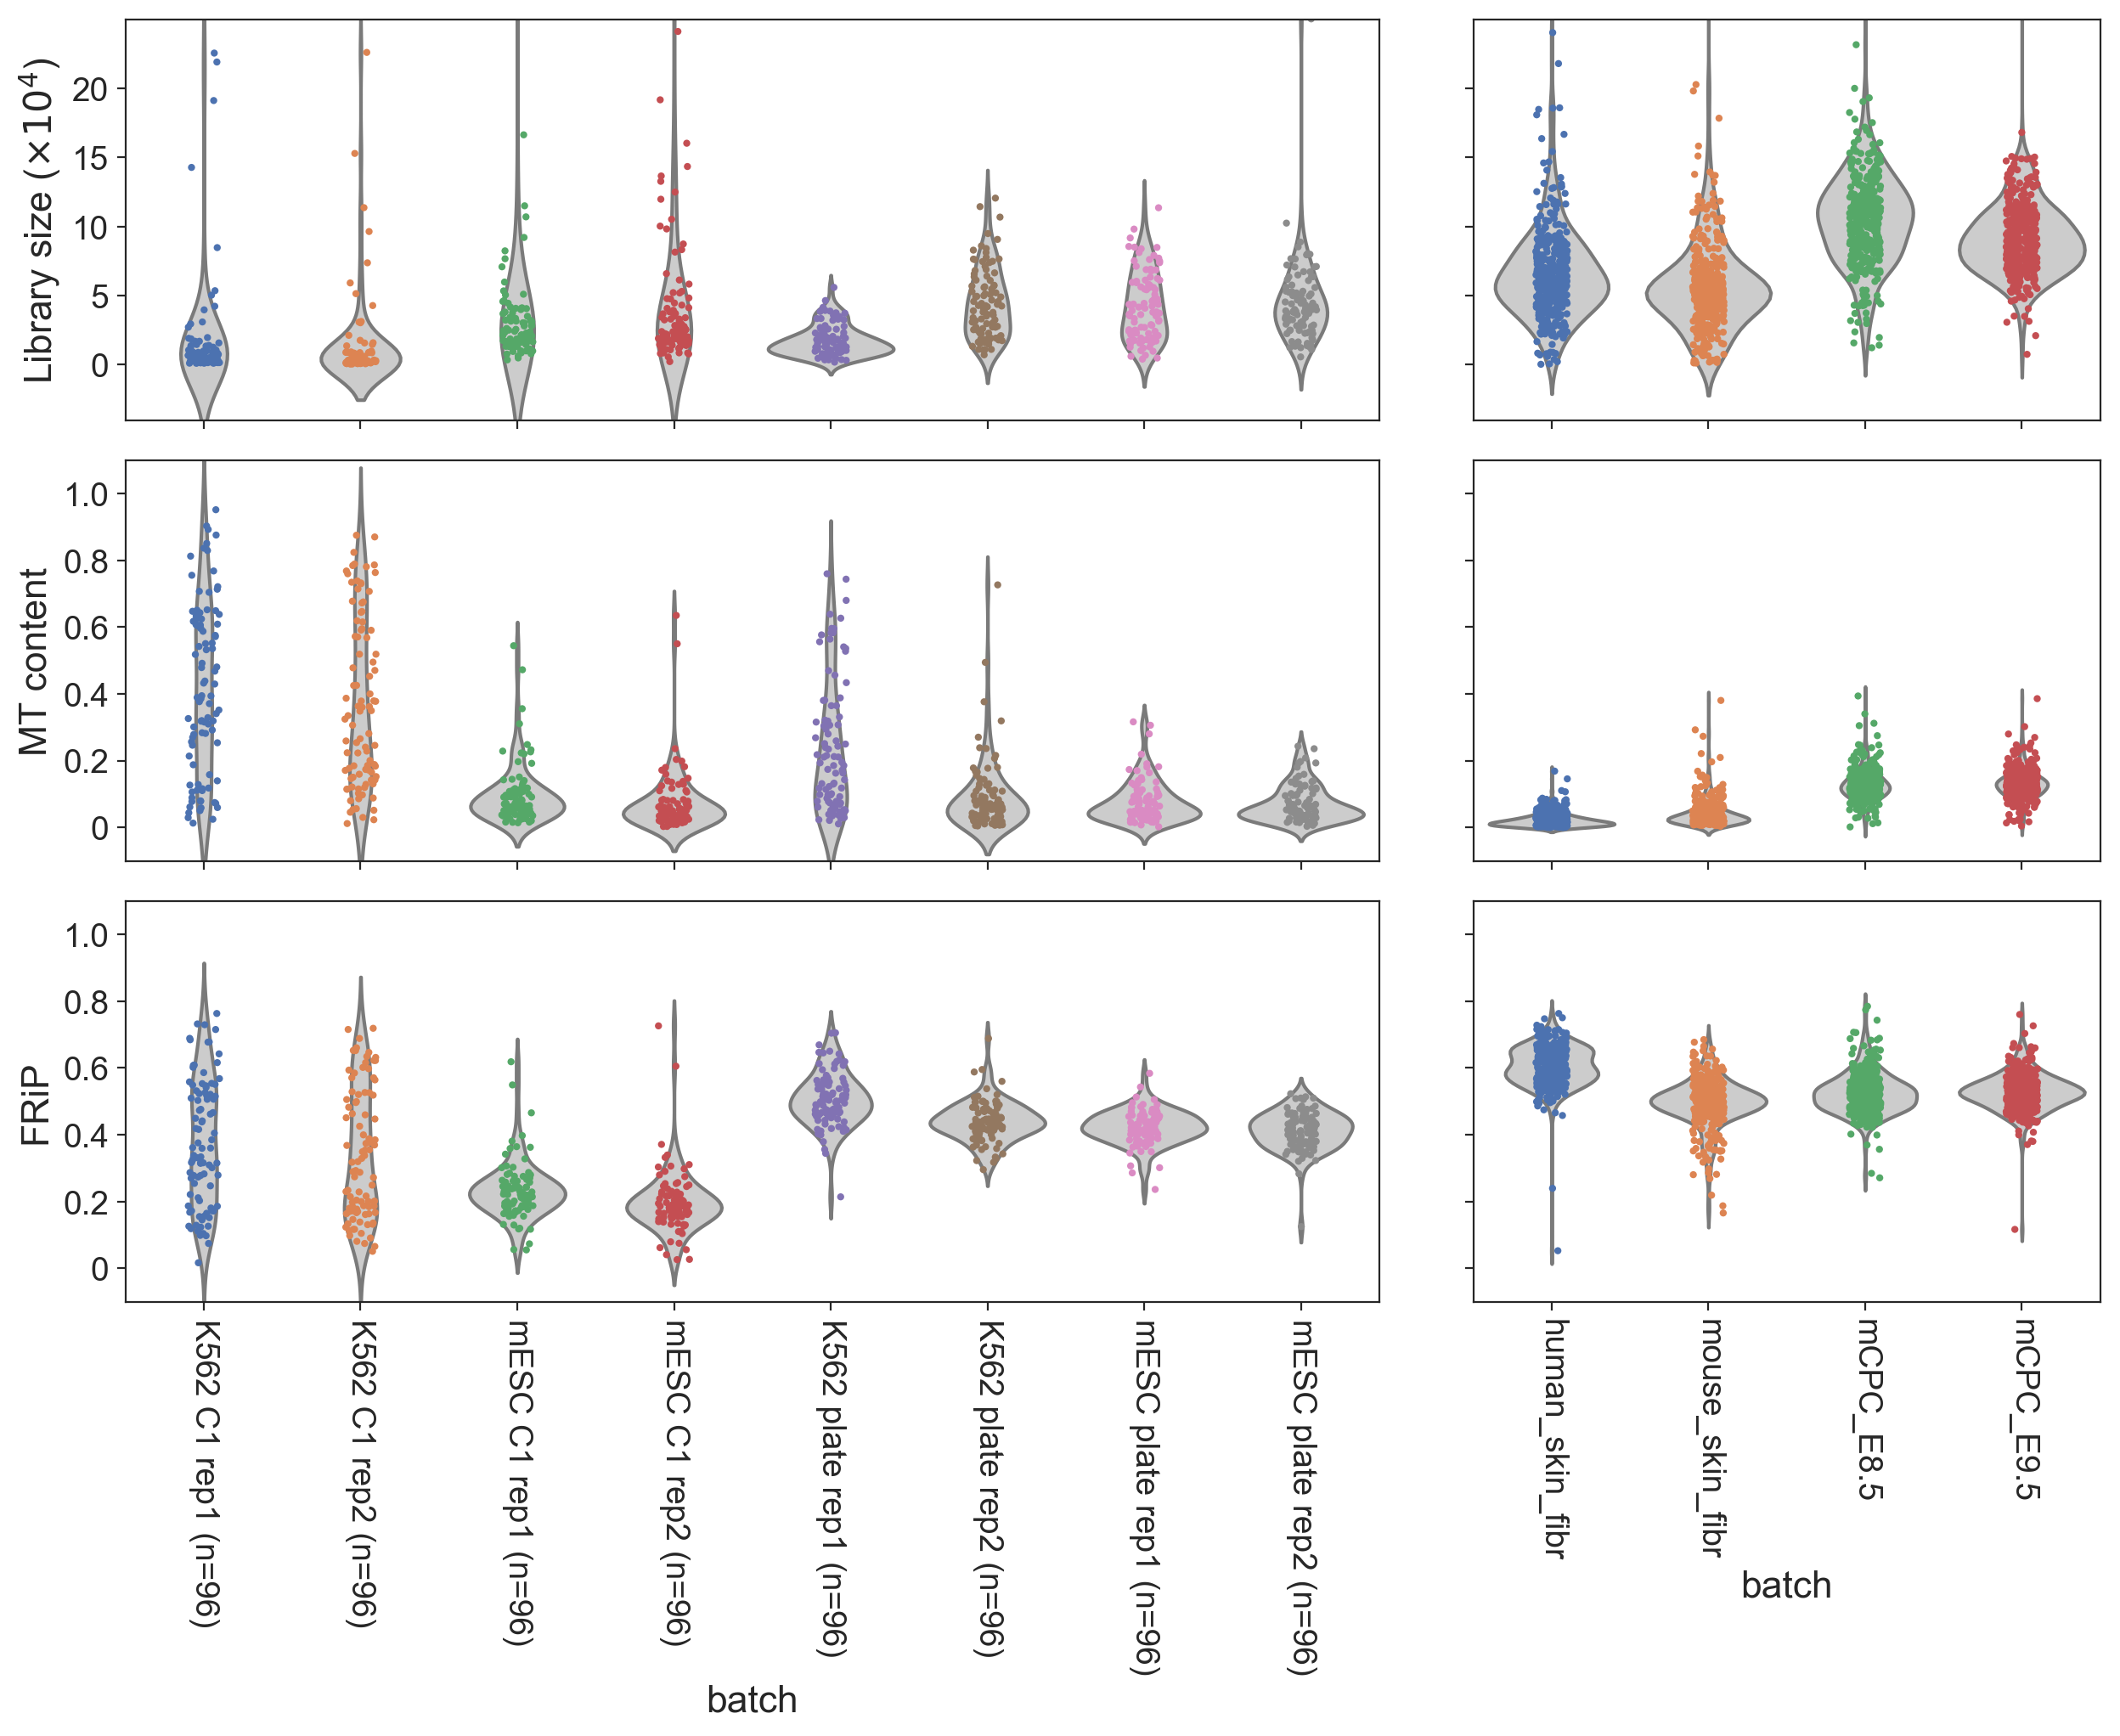

In [47]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=3,
                       sharex='col', sharey='row',
                       gridspec_kw={'width_ratios' : [2, 1],
                                    'wspace' : 0.1, 'hspace' : 0.1})

for qc, p in zip(['library_size', 'mt_content', 'frip'], ax):
    
    sns.violinplot(x='batch', y=qc, data=compare,
                   inner=None, color='.8', width=.8, ax=p[0],
                   order=order1, zorder=1)
    sns.stripplot(x='batch', y=qc, data=compare,
                  jitter=True, ax=p[0], s=3, order=order1, zorder=2)

    sns.violinplot(x='batch', y=qc, data=others, inner=None,
                   color='.8', width=.8, ax=p[1], order=order2, zorder=1)
    sns.stripplot(x='batch', y=qc, data=others,
                  jitter=True, ax=p[1], s=3, order=order2, zorder=2)

    xtls = p[0].get_xticklabels() + p[1].get_xticklabels()

    for xtl in xtls:
        xtl.set_rotation(270)

ax[0][0].set_ylim(-40000, 250000)
ax[0][0].set_yticks(range(0, 250000, 50000))
ax[0][0].set_yticklabels(['0', '5', '10', '15', '20'])
ax[0][0].set_ylabel(r'Library size ($\times 10^4$)')
ax[0][0].set_xlabel('')
ax[0][1].set_ylabel('')
ax[0][1].set_xlabel('')

ax[1][0].set_ylim(-.1, 1.1)
ax[1][0].set_yticks((0, .2, .4, .6, .8, 1.0))
ax[1][0].set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
ax[1][0].set_ylabel('MT content')
ax[1][0].set_xlabel('')
ax[1][1].set_ylabel('')
ax[1][1].set_xlabel('')


ax[2][0].set_ylim(-.1, 1.1)
ax[2][0].set_yticks((0, .2, .4, .6, .8, 1.0))
ax[2][0].set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
ax[2][0].set_ylabel('FRiP')
ax[2][1].set_ylabel('')

plt.savefig('figures/c1_vs_plate_side_by_side_violin.pdf',
            bbox_inches='tight', transparent=True)

# Deprecated (not side-by-side, not used in the manuscript): comparing downsampled plate scATAC-seq with C1 scATAC-seq from Buenrostro _et al._ 2015

In [49]:
# it seems the sequencing depth of C1 scATAC is about 20% of our plate scATAC
# so here 20% of downsampled of our data is used
qcs = glob('cmp_to_buenrostro_c1/qc_metrics/*.txt')

dfs = []
for qc in qcs:
    dfs.append(pd.read_table(qc, index_col=0))

batches = {}
for i in range(1,5):
    batches['rep{}'.format(i)] = 'Sp#1 (n=960)'
for i in range(5,12):
    batches['rep{}'.format(i)] = 'Sp#2 (n=2688)'    

ds_plate_qc = pd.concat(dfs, axis=1)
ds_plate_qc['plate'] = ds_plate_qc.index.str.extract('mSp_(.*)_.*', expand=False)
ds_plate_qc['batch'] = ds_plate_qc.plate.replace(batches) 

ds_plate_qc.head(2)

,dup_level,frac_open,frip,library_size,mapping_rate,mt_content,sequencing_depth,uniq_frags,plate,batch
cell,,,,,,,,,,
mSp_rep10_001,0.774630,0.165905,0.737259,29665.0,97.05,0.008944,140871,29033.0,rep10,Sp#2 (n=2688)
mSp_rep10_002,0.784939,0.202633,0.676183,41291.0,96.44,0.023460,210428,39919.0,rep10,Sp#2 (n=2688)


In [51]:
ds_plate_qc.median()

dup_level                0.770263
frac_open                0.156997
frip                     0.733419
library_size         27727.000000
mapping_rate            97.050000
mt_content               0.019173
sequencing_depth    128320.000000
uniq_frags           26448.000000
dtype: float64

In [52]:
qcs = glob('buenrostro_c1/qc_metrics/*.txt')

dfs = []
for qc in qcs:
    dfs.append(pd.read_table(qc, index_col=0))

c1_qc = pd.concat(dfs, axis=1)

annotation = pd.concat([pd.read_table('buenrostro_c1/PRJNA274006.txt'),
                        pd.read_table('buenrostro_c1/PRJNA299657.txt')])

c1_qc.rename(index=dict(annotation[['run_accession', 'sample_title']].values),
             inplace=True)
c1_qc['cells'] = c1_qc.index.str.split('-').str[1]
c1_qc['batch'] = c1_qc.index.str.extract('singles-(.*)-.*-.*', expand=False)

# one sample is not captured with str.extract
c1_qc['batch'].fillna('BM1077-LMPP', inplace=True)

# add number of cells into batch name
n = c1_qc['batch'].value_counts()
rebatch = {}
for i in n.index:
    rebatch[i] = str(i) + ' (n=%s)' % str(n[i])
c1_qc.replace({'batch' : rebatch}, inplace=True)

In [53]:
c1_qc.median()

dup_level                0.612317
frac_open                0.067088
frip                     0.554559
library_size         30334.000000
mapping_rate            69.775000
mt_content               0.536170
sequencing_depth    134669.000000
uniq_frags            8647.500000
dtype: float64

In [54]:
c1_qc.batch.value_counts()

SU070 (n=192)          192
K562-rep1 (n=192)      192
K562-rep2 (n=192)      192
K562-rep3 (n=192)      192
H1ESC (n=96)            96
K562-CDKi (n=96)        96
mESC (n=96)             96
K562-Imat1hr (n=96)     96
GM-rep1 (n=96)          96
GM-TNFa6h (n=96)        96
PB1022-mono (n=96)      96
EML (n=96)              96
SU353-LSC (n=96)        96
BJ (n=96)               96
GM-rep4 (n=96)          96
SU353-Blast (n=96)      96
GM-rep2 (n=96)          96
TF1 (n=96)              96
GM-rep3 (n=96)          96
HL60 (n=96)             96
K562-JNKi (n=96)        96
BM1077-LMPP (n=96)      96
Name: batch, dtype: int64

In [56]:
sample_info = pd.concat([ds_plate_qc, c1_qc], sort=False)
sample_info.head(2)

,dup_level,frac_open,frip,library_size,mapping_rate,mt_content,sequencing_depth,uniq_frags,plate,batch,cells
cell,,,,,,,,,,,
mSp_rep10_001,0.774630,0.165905,0.737259,29665.0,97.05,0.008944,140871,29033.0,rep10,Sp#2 (n=2688),NaN
mSp_rep10_002,0.784939,0.202633,0.676183,41291.0,96.44,0.023460,210428,39919.0,rep10,Sp#2 (n=2688),NaN


In [57]:
median_info = sample_info.groupby("batch").median()

# call drop_duplicates on sample_info to re-order the experiments
median_info = median_info.loc[sample_info.batch.drop_duplicates().values,]
reorder = [1, 0] + list(range(2,24))
median_info = median_info.iloc[reorder,]
median_info.head(2)

,dup_level,frac_open,frip,library_size,mapping_rate,mt_content,sequencing_depth,uniq_frags
batch,,,,,,,,
Sp#1 (n=960),0.802241,0.155556,0.733978,27425.0,97.165,0.021380,148639.0,26593.5
Sp#2 (n=2688),0.760225,0.157420,0.733321,27821.0,97.010,0.018632,122675.5,26426.5


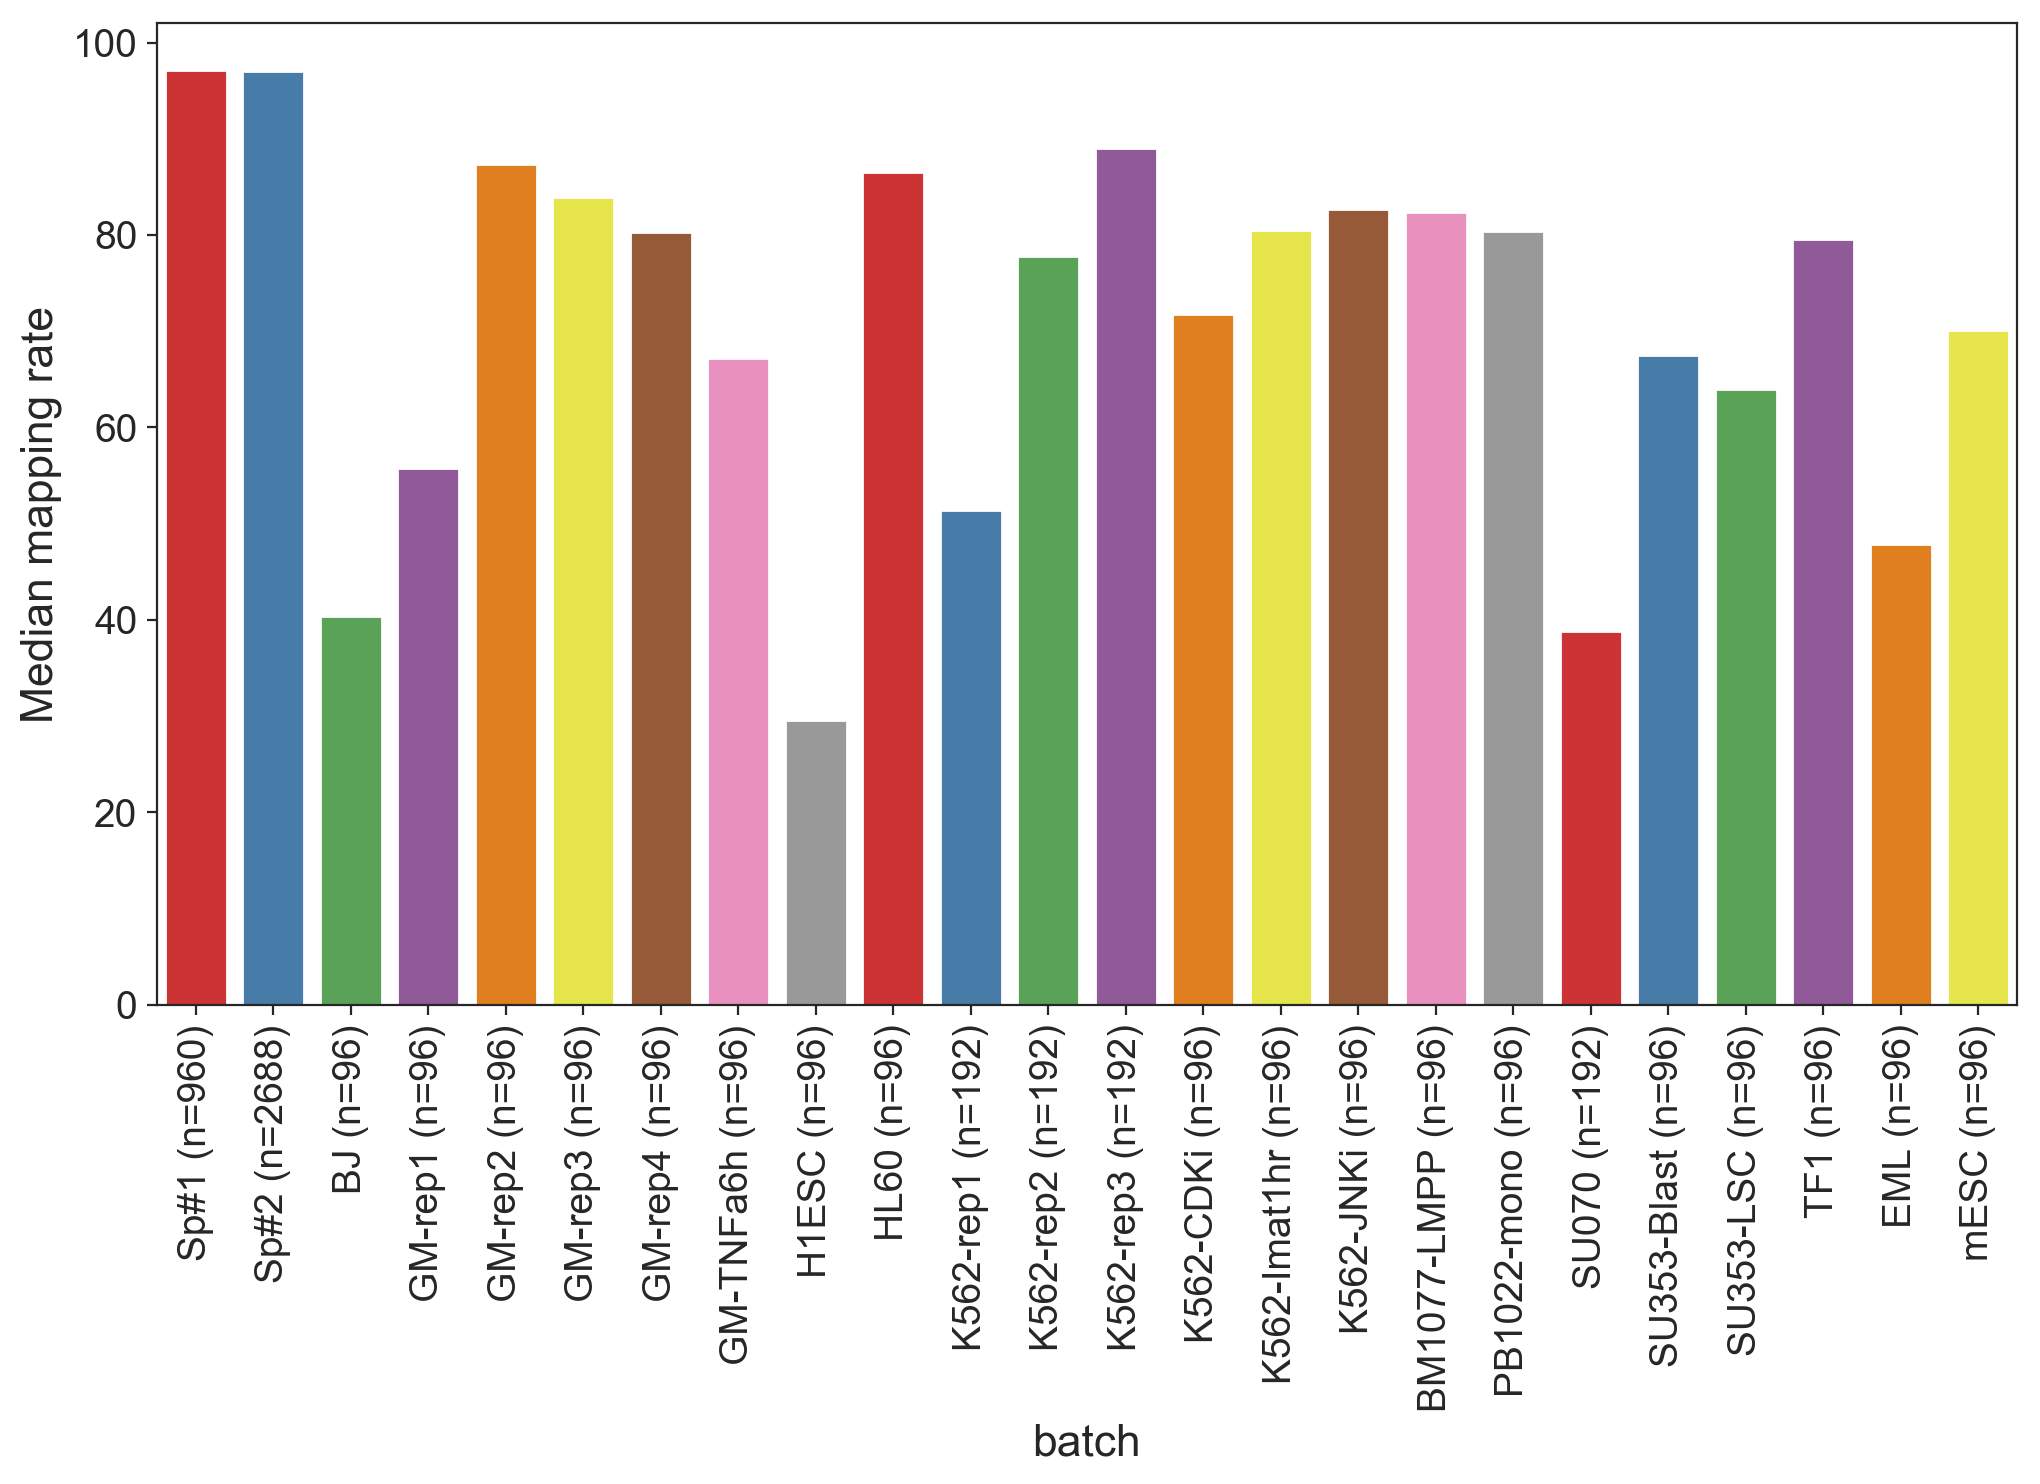

In [58]:
fig, ax = plt.subplots(figsize=(12, 6.5))

sns.barplot(x=median_info.index, y="mapping_rate", data=median_info, palette="Set1", ax=ax)
ax.set_ylabel("Median mapping rate")
for xt in ax.get_xticklabels():
    xt.set_rotation(90)
# plt.savefig("figures/compare_mapping_rate.pdf", bbox_inches="tight", transparent=True)

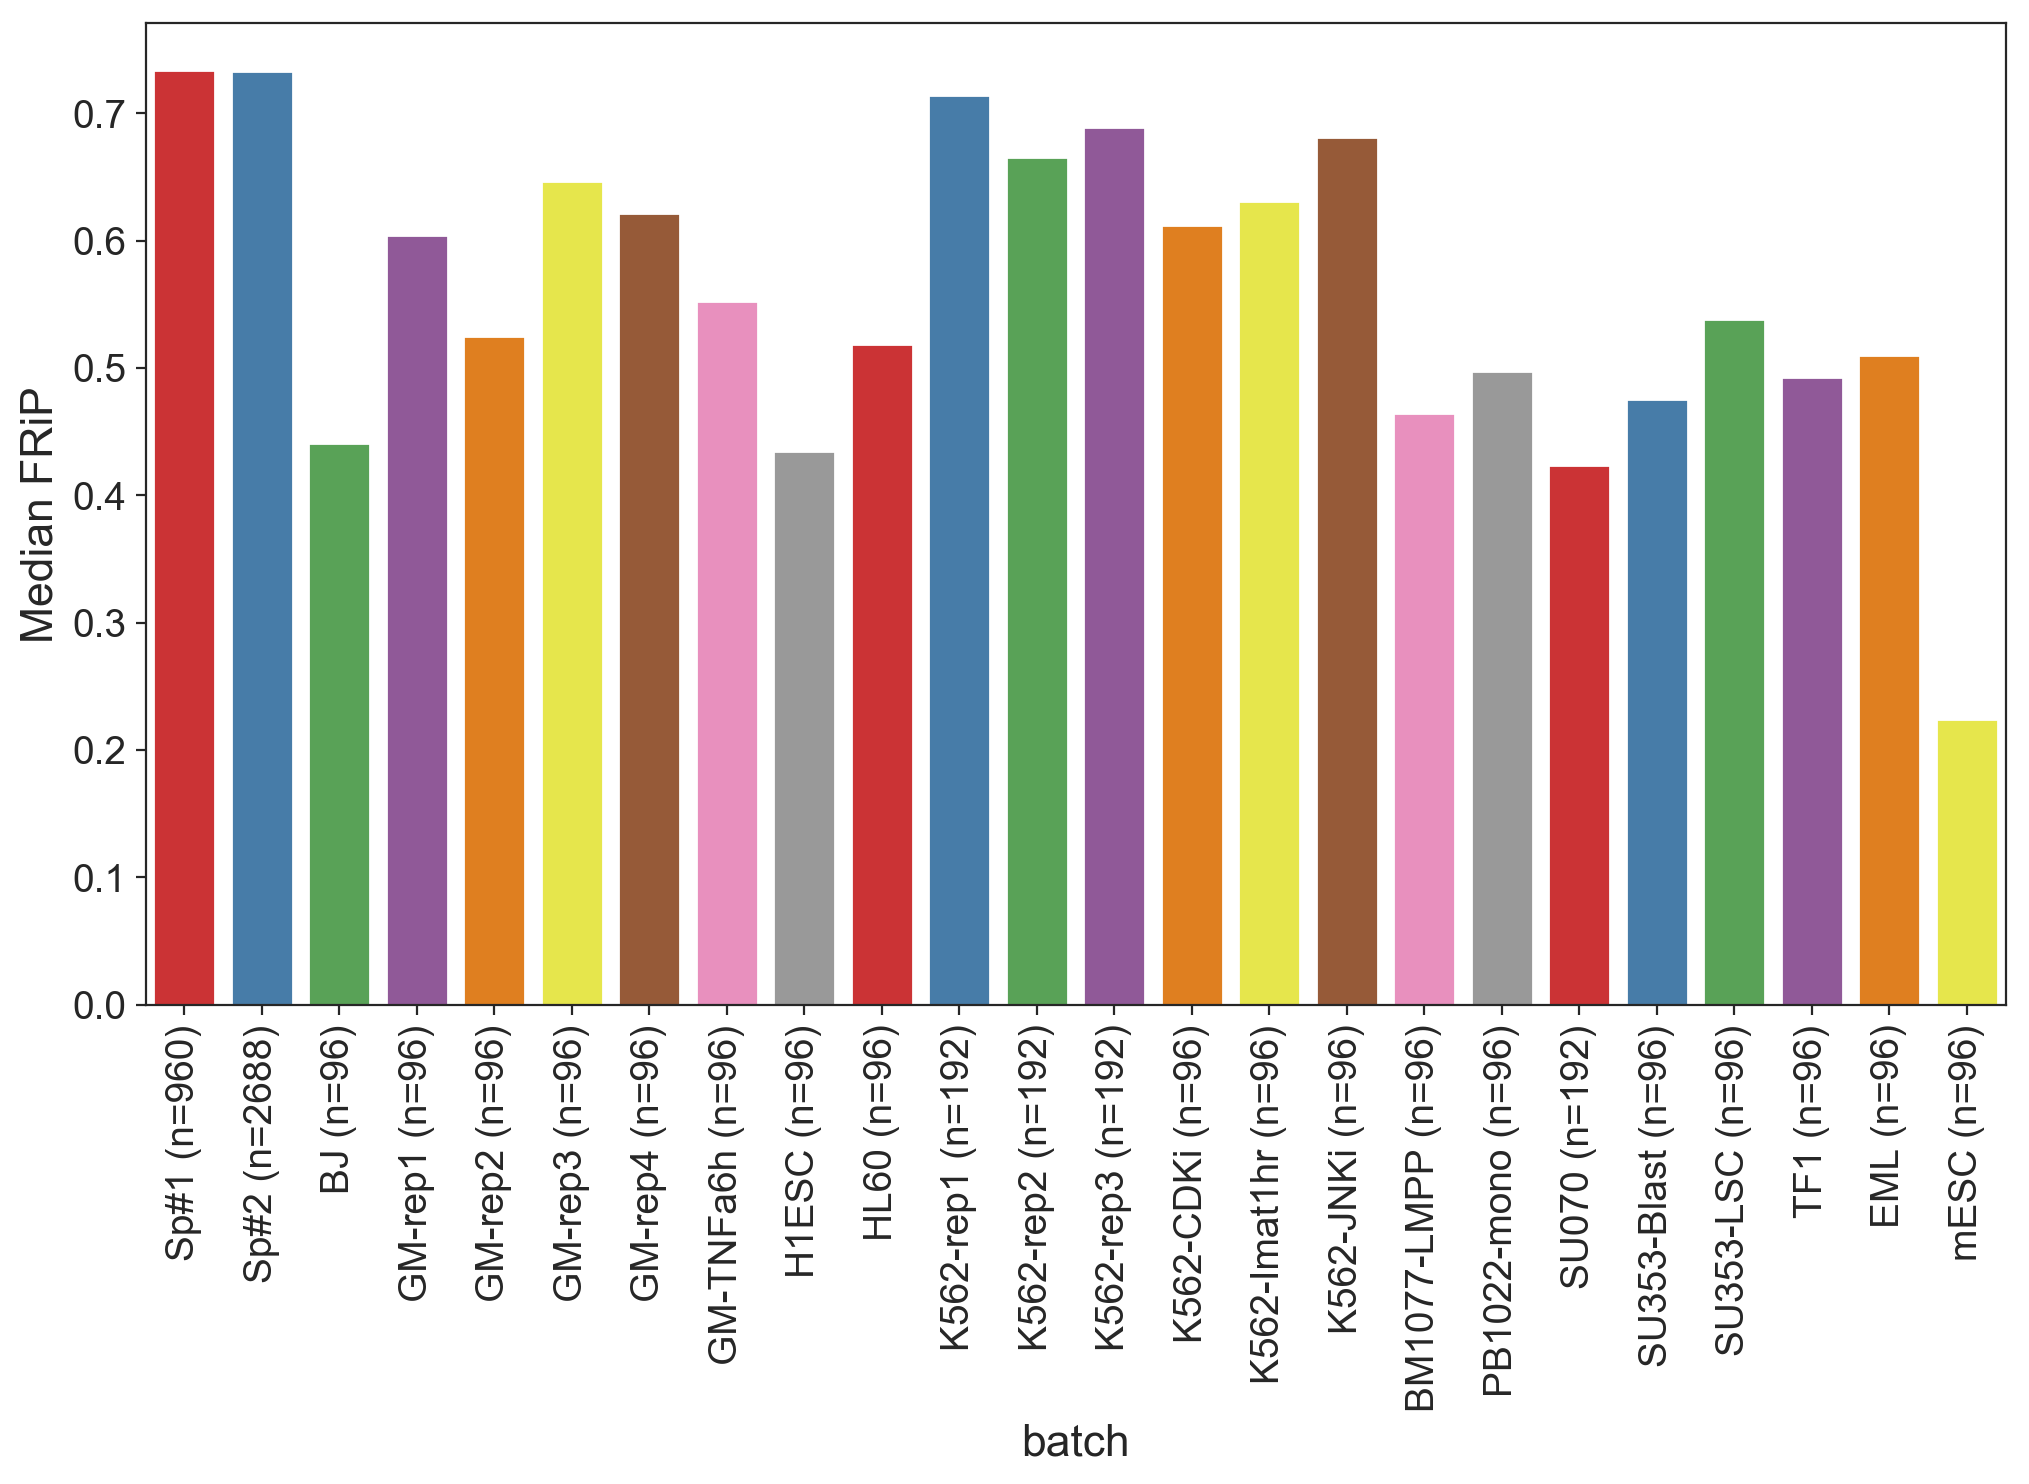

In [59]:
fig, ax = plt.subplots(figsize=(12, 6.5))

sns.barplot(x=median_info.index, y='frip', data=median_info, palette='Set1', ax=ax)
ax.set_ylabel('Median FRiP')
for xt in ax.get_xticklabels():
    xt.set_rotation(90)
# plt.savefig('figures/compare_frip.pdf', bbox_inches='tight', transparent=True)

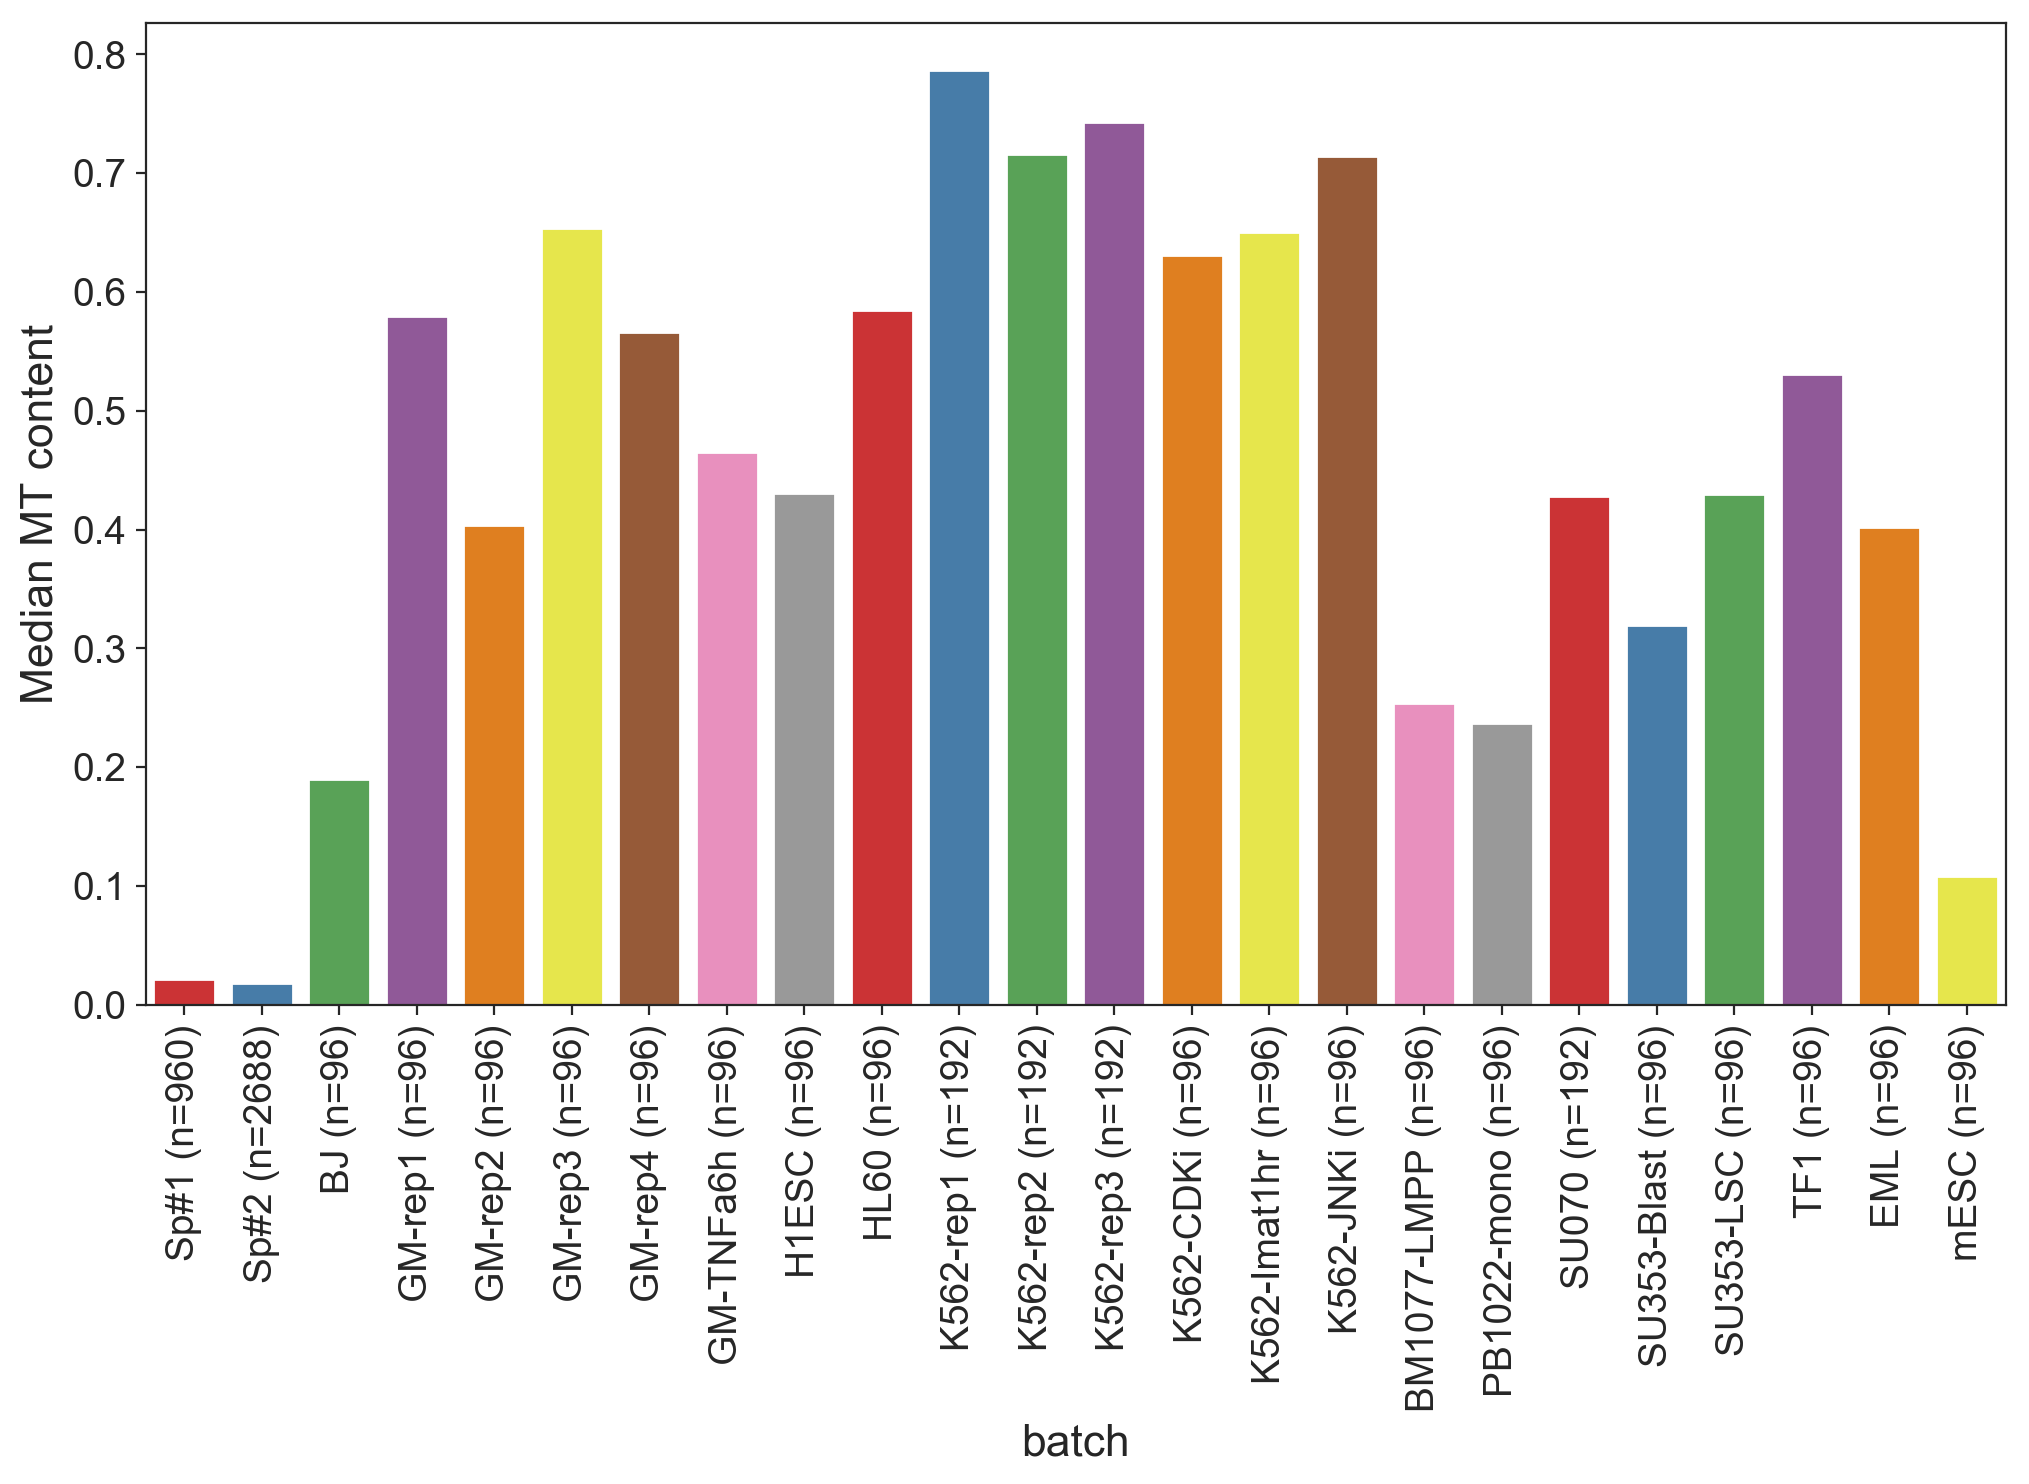

In [60]:
# this is not a entirely fair comparison since we used digitonin in this study
# while the C1 studies were using NP-40

fig, ax = plt.subplots(figsize=(12, 6.5))

sns.barplot(x=median_info.index, y='mt_content', data=median_info, palette='Set1', ax=ax)
ax.set_ylabel('Median MT content')
for xt in ax.get_xticklabels():
    xt.set_rotation(90)
# plt.savefig('figures/compare_mt_content.pdf', bbox_inches='tight', transparent=True)

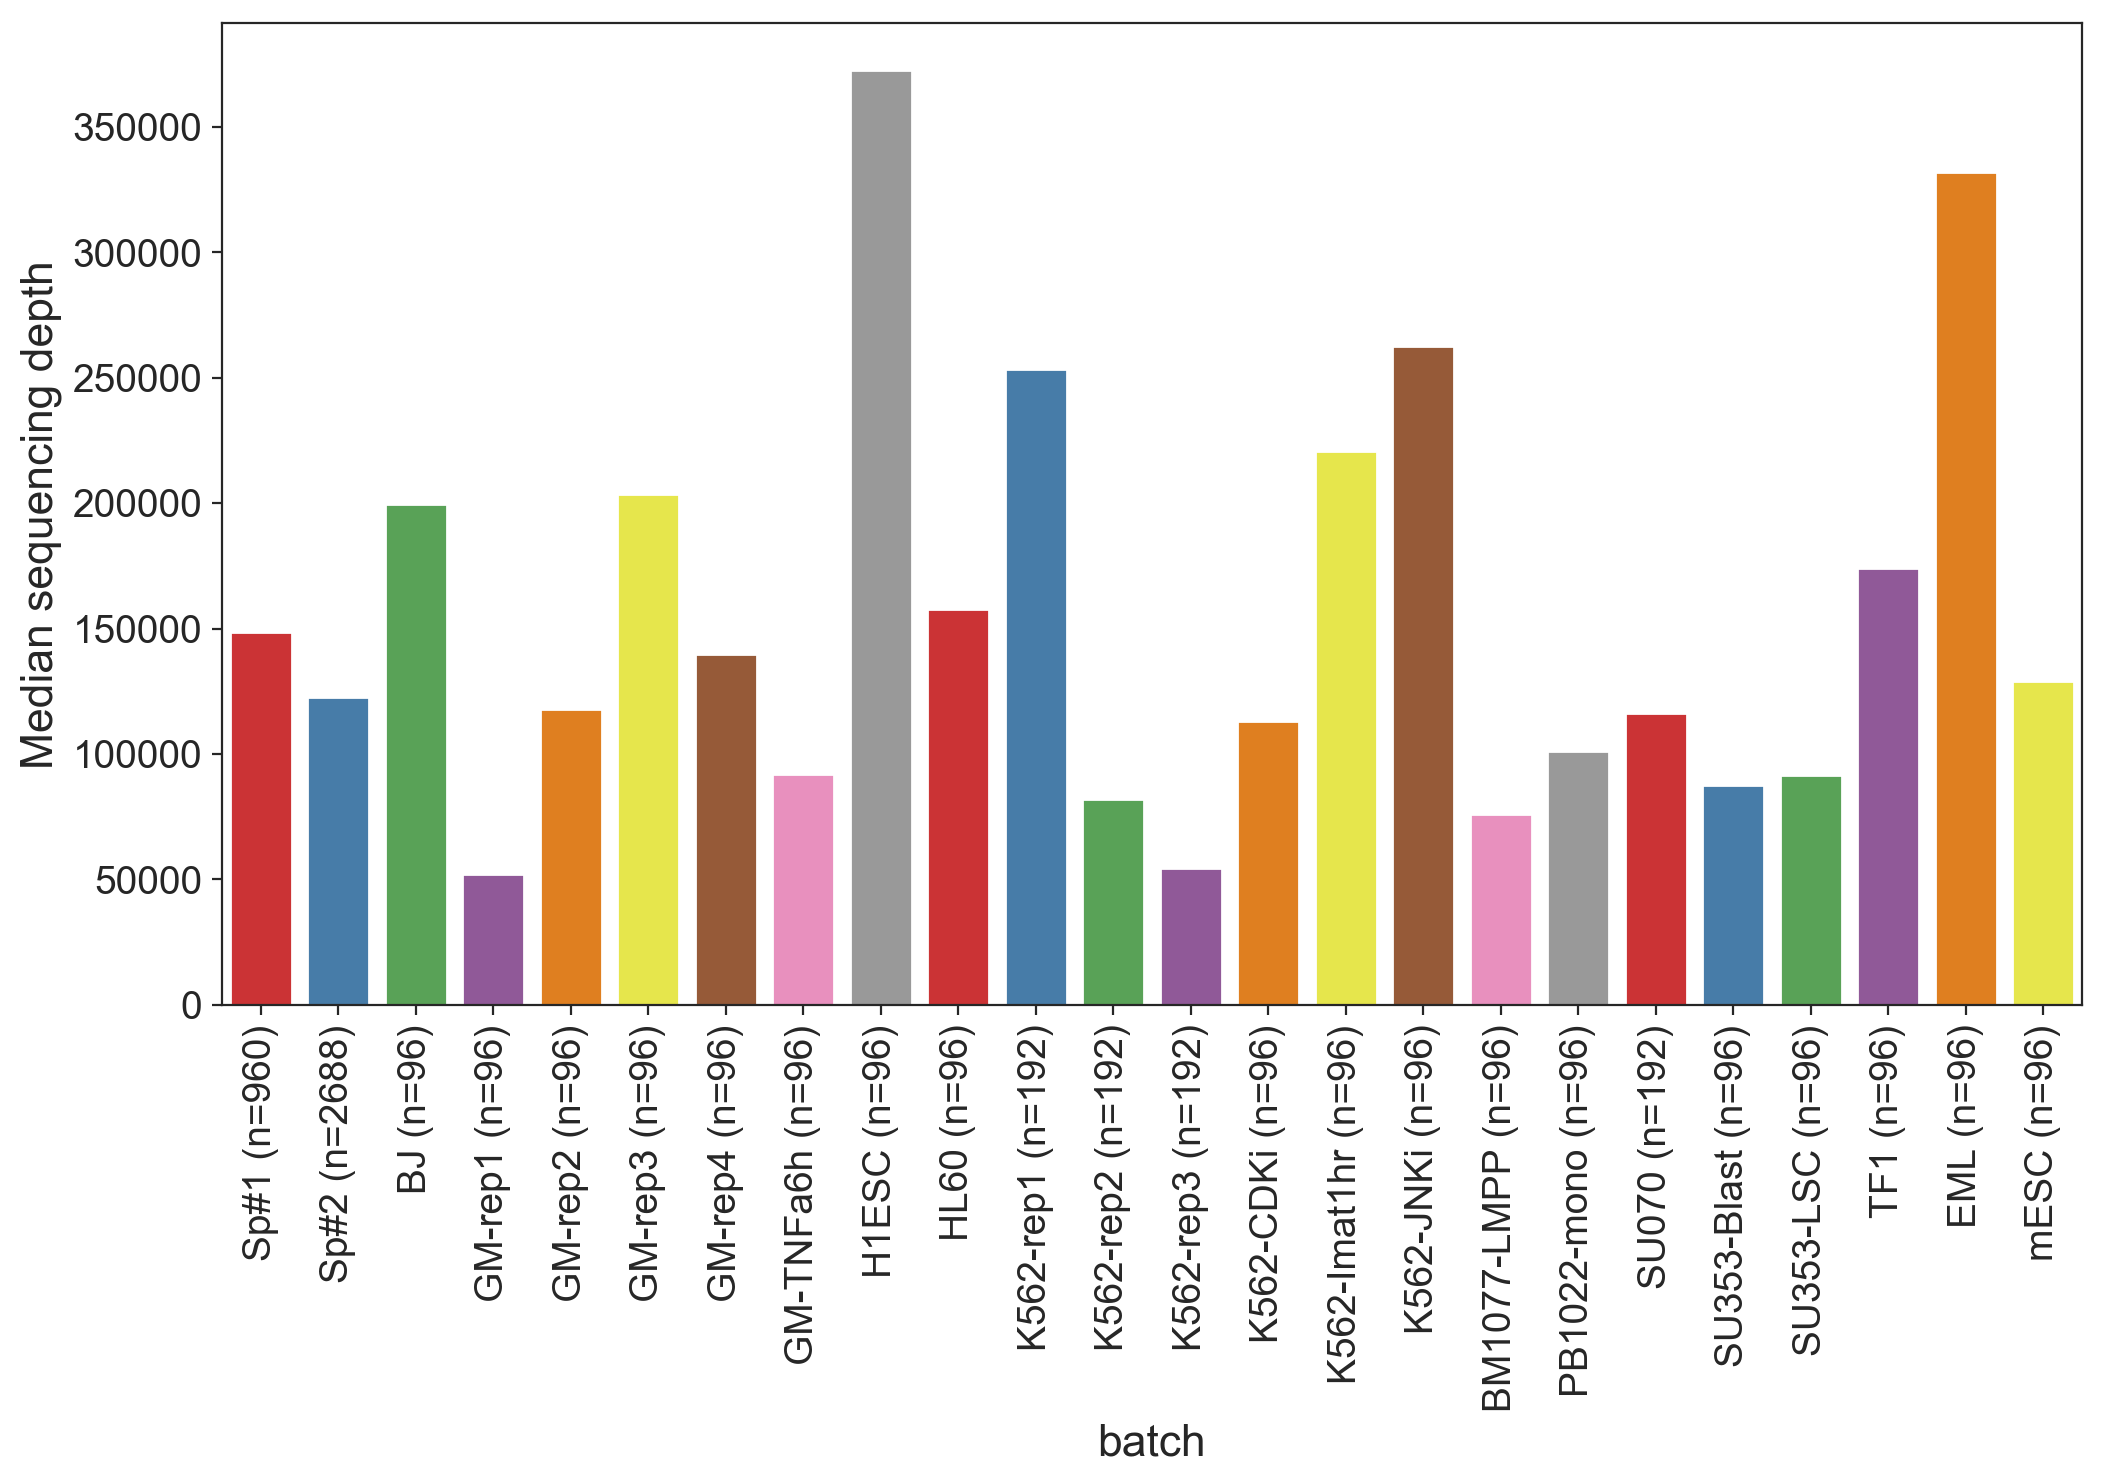

In [61]:
fig, ax = plt.subplots(figsize=(12, 6.5))

sns.barplot(x=median_info.index, y='sequencing_depth', data=median_info, palette='Set1', ax=ax)
ax.set_ylabel('Median sequencing depth')
for xt in ax.get_xticklabels():
    xt.set_rotation(90)
# plt.savefig('figures/compare_sequencing_depth.pdf', bbox_inches='tight', transparent=True)

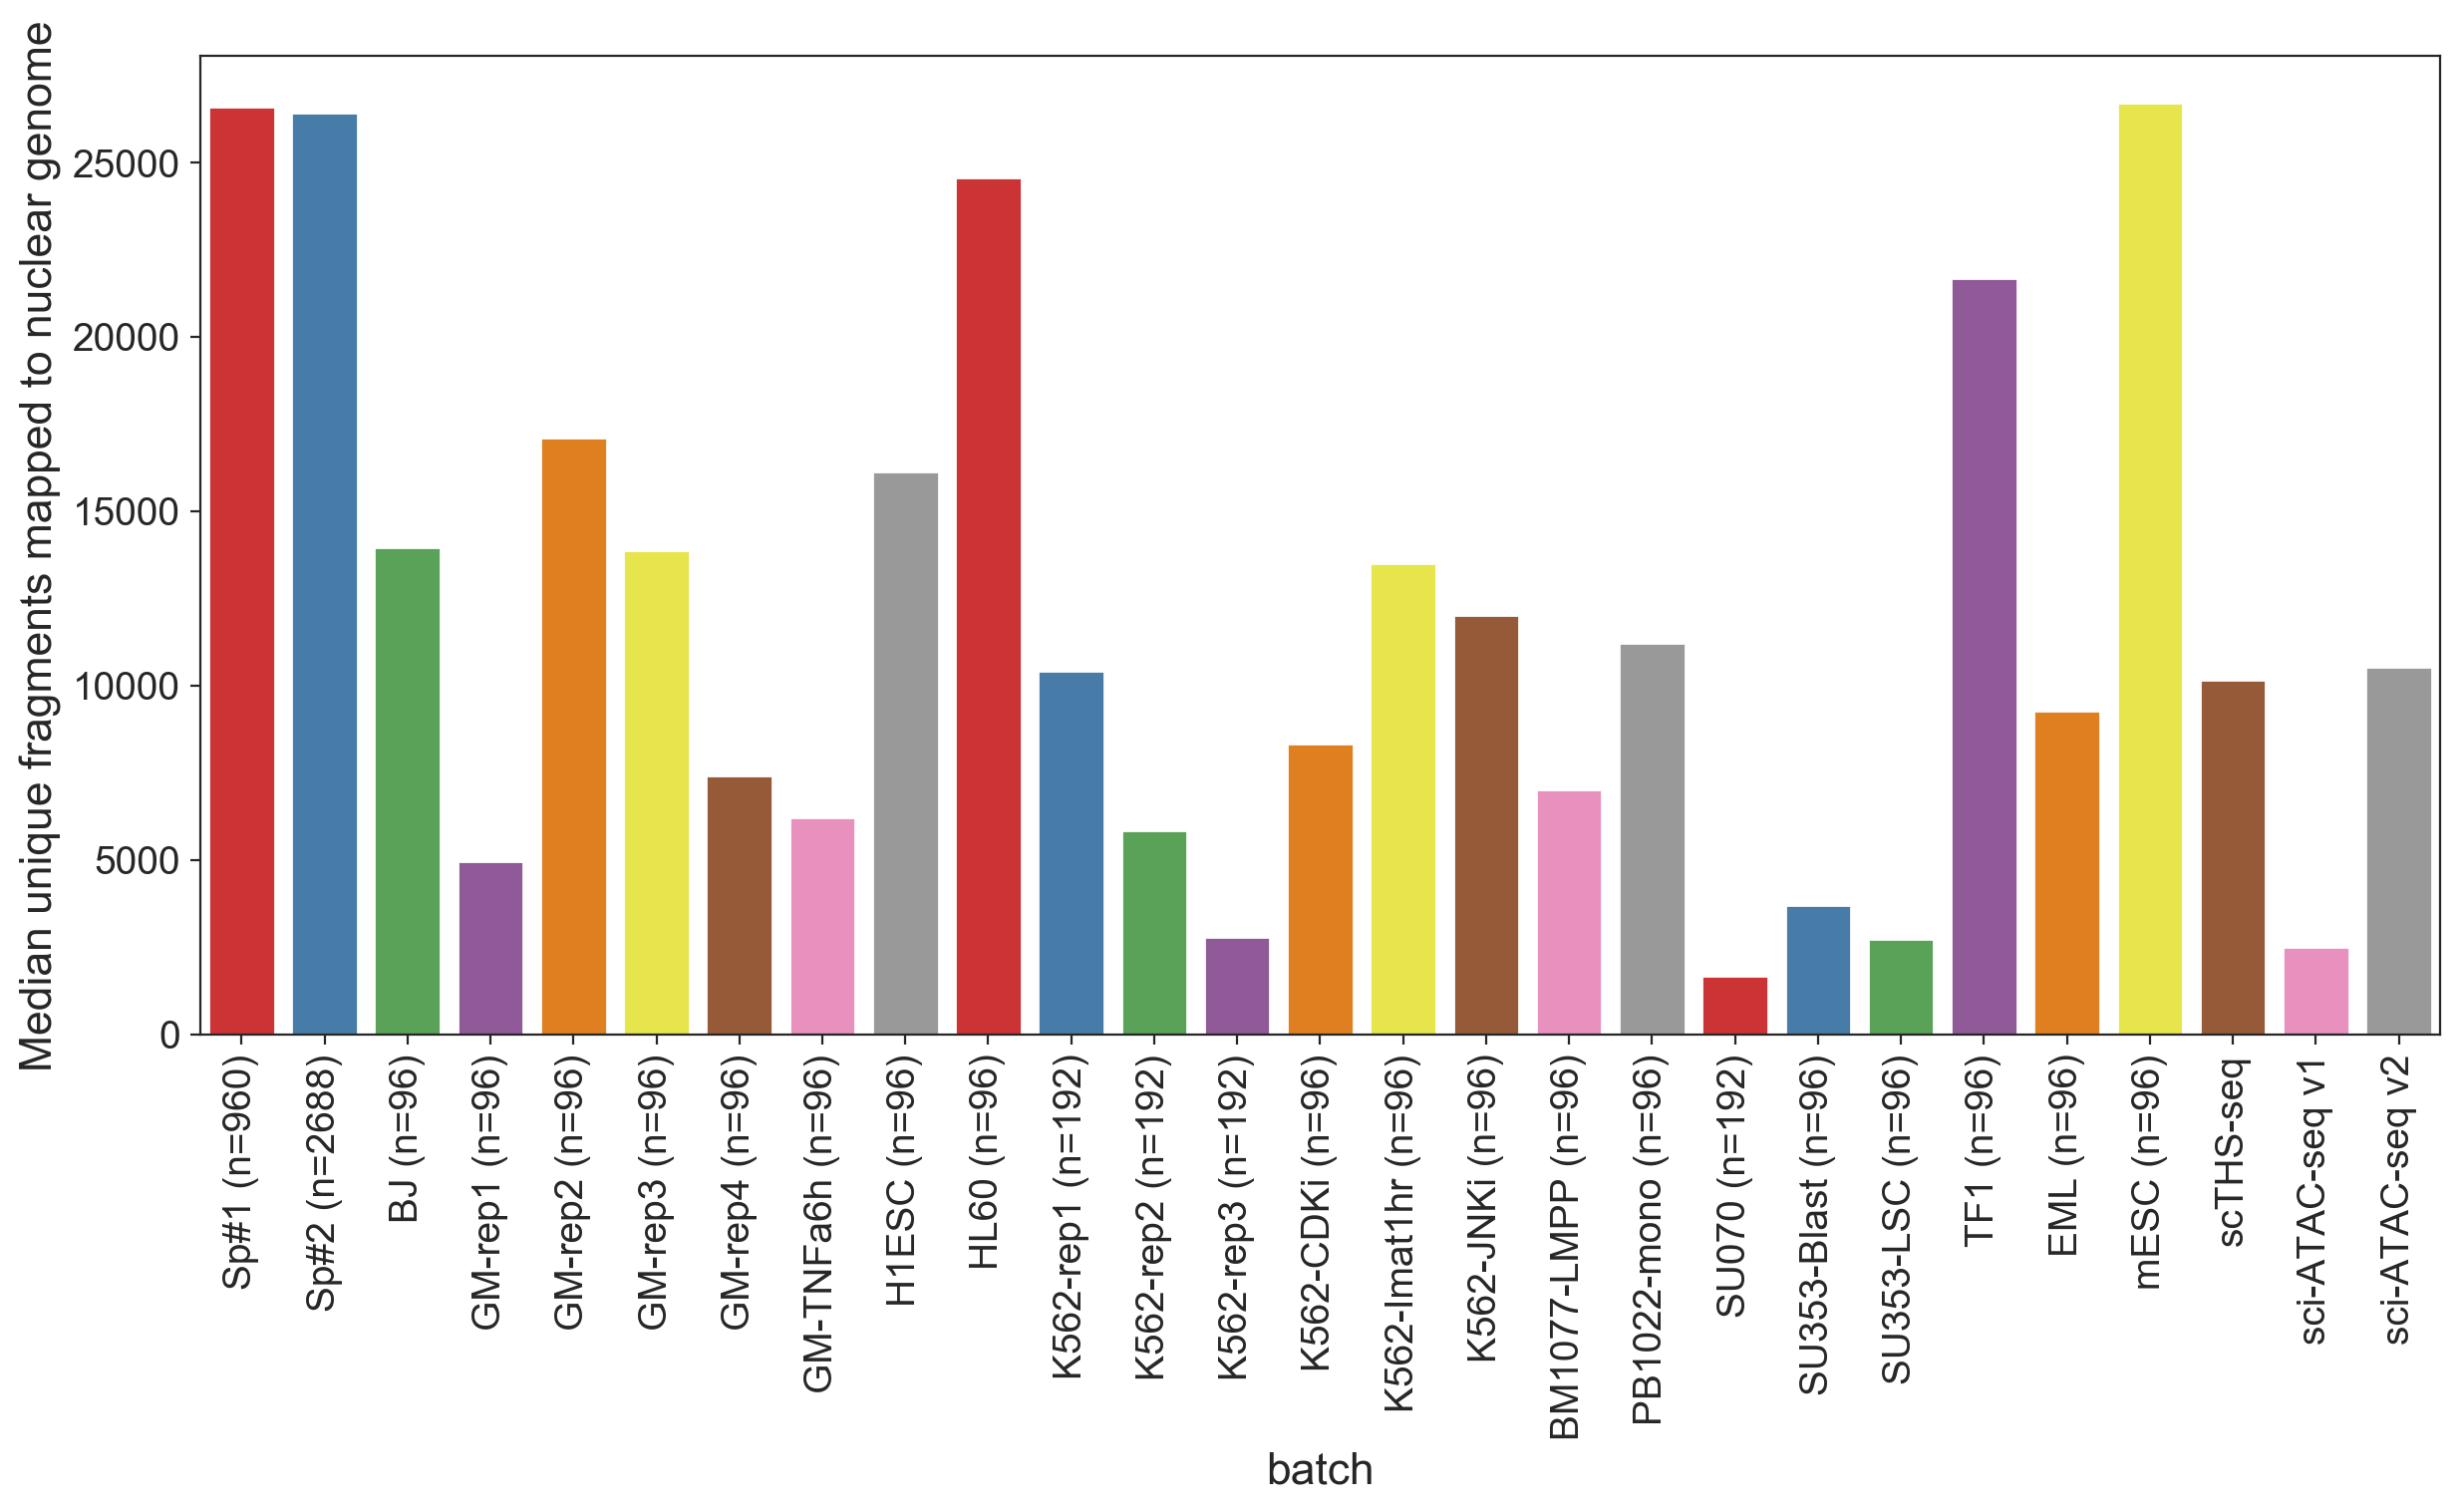

In [62]:
# add information of scTHS-seq (Lake et al. 2018 Nature Biotechnology 36, 70–80.)
# & sci-ATAC-seq v1 (Cusanovich et al. 2015 Science 348: 910–914.)
# & sci-ATAC-seq v2 (Cusanovich et al. 2017 doi: https://doi.org/10.1101/166066)

median_info.loc['scTHS-seq','uniq_frags'] = 10168
median_info.loc['sci-ATAC-seq v1', 'uniq_frags'] = 2503
median_info.loc['sci-ATAC-seq v2', 'uniq_frags'] = 10540

fig, ax = plt.subplots(figsize=(14.5, 6.5))

sns.barplot(x=median_info.index, y='uniq_frags', data=median_info, palette='Set1', ax=ax)
ax.set_ylabel('Median unique fragments mapped to nuclear genome')
for xt in ax.get_xticklabels():
    xt.set_rotation(90)
# plt.savefig('figures/compare_uniq_frags.pdf',
#             bbox_inches='tight', transparent=True)

# Downsampling analysis to look at # of unique fragments

In [30]:
!ls downsampling/*/qc_metrics/uniq_frags.txt

downsampling/0.1/qc_metrics/uniq_frags.txt
downsampling/0.2/qc_metrics/uniq_frags.txt
downsampling/0.3/qc_metrics/uniq_frags.txt
downsampling/0.4/qc_metrics/uniq_frags.txt
downsampling/0.5/qc_metrics/uniq_frags.txt
downsampling/0.6/qc_metrics/uniq_frags.txt
downsampling/0.7/qc_metrics/uniq_frags.txt
downsampling/0.8/qc_metrics/uniq_frags.txt
downsampling/0.9/qc_metrics/uniq_frags.txt


In [31]:
f = list(iglob('downsampling/*/qc_metrics/uniq_frags.txt'))
f.sort()

dfs = []

for i in f:
    frac = i.split('/')[1]
    dfs.append(pd.read_table(i, header=None, skiprows=1, names=['cell', frac],
                             index_col='cell'))
ufrags = pd.concat(dfs, axis=1)
ufrags['1.0'] = plate_qc.loc[:, 'uniq_frags']
ufrags.head(2)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
cell,,,,,,,,,,
mSp_rep3_001,28539.0,31470.0,32380.0,32885.0,33233.0,33503.0,33734.0,33956.0,34136.0,34304.0
mSp_rep3_002,5353.0,6004.0,6200.0,6324.0,6413.0,6483.0,6536.0,6582.0,6615.0,6659.0


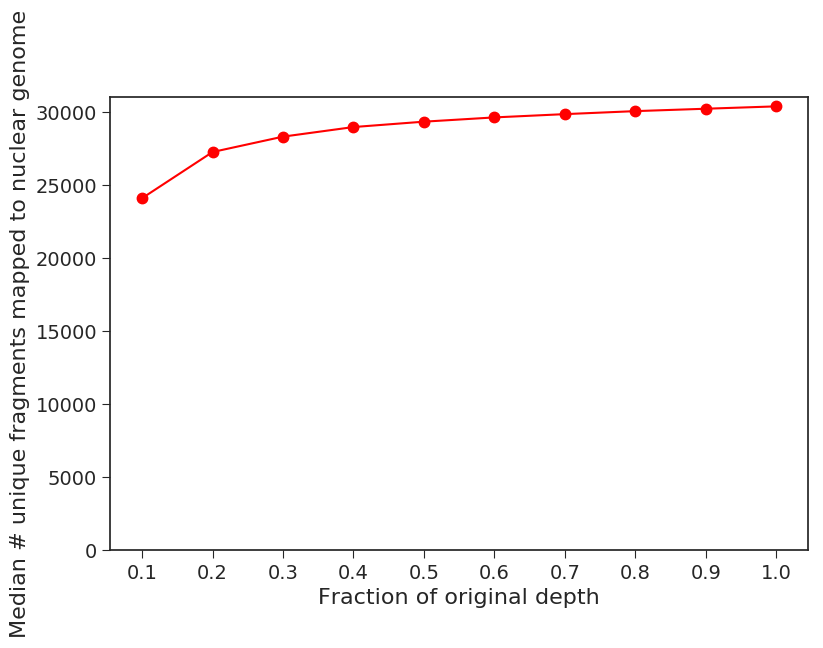

In [32]:
plt.figure(figsize=(9, 6))
plt.plot(ufrags.columns.astype(float), ufrags.median(), 'r.-', ms=15)
plt.xticks(ufrags.columns.astype(float), ufrags.columns.values)
plt.ylim(0, 31000)
plt.xlabel('Fraction of original depth')
plt.ylabel('Median # unique fragments mapped to nuclear genome')

plt.savefig('figures/subsampling_unique_fragments_median.pdf',
            bbox_inches='tight', transparent=True)

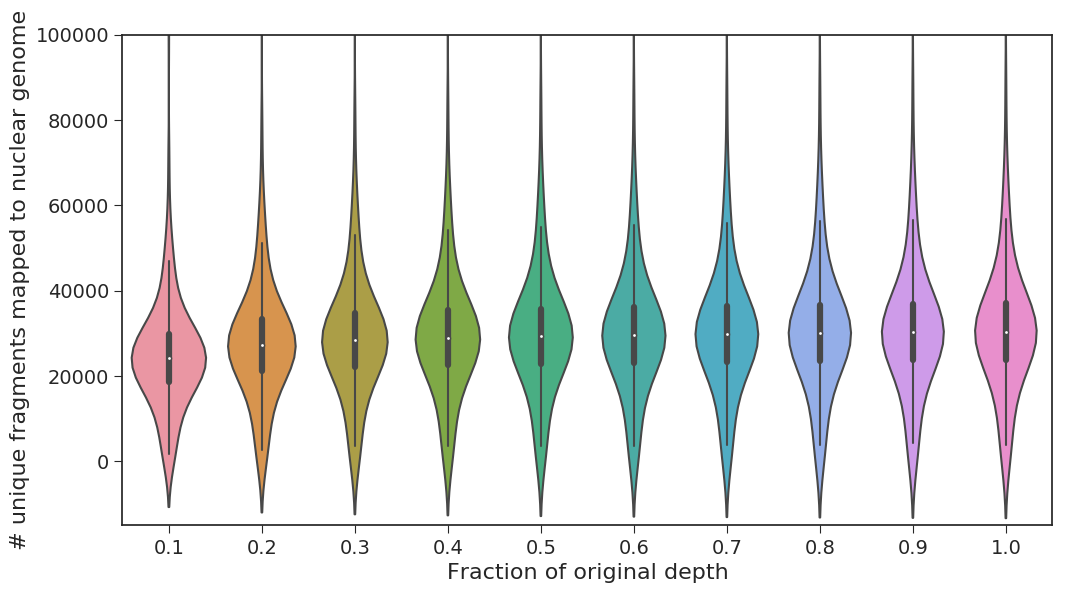

In [33]:
violin_data = ufrags.melt(value_vars=ufrags.columns)

fig, ax = plt.subplots(figsize=(12, 6.5))

sns.violinplot(x='variable', y='value', data=violin_data, ax=ax)
ax.set_xlabel('Fraction of original depth')
ax.set_ylabel('# unique fragments mapped to nuclear genome')
ax.set_ylim(-15000, 100000)

plt.savefig('figures/subsampling_unique_fragments_violin.pdf',
            bbox_inches='tight', transparent=True)

# Perform some basic exploratory analysis

In [34]:
from scipy.io import mmread

count = mmread('cmp_to_immgen/mSp_scATAC_count_matrix_over_all.mtx')
idxs = [i.strip() for i in open('cmp_to_immgen/mSp_scATAC_count_matrix_over_all.rownames')]
cols = [i.strip() for i in open('cmp_to_immgen/mSp_scATAC_count_matrix_over_all.colnames')]

sc_count = pd.DataFrame(data=count.toarray(),
                        index=idxs,
                        columns=cols)

sc_count.drop(labels=bad_cells.index, axis=1, inplace=True)

# binarise the data
bin_sc_count = sc_count.where(sc_count < 1, 1)
sc_count = sc_count.loc[bin_sc_count.index, bin_sc_count.columns]
bin_sc_count.shape

(127856, 3386)

In [35]:
bin_sc_count.head(2)

,mSp_rep7_276,mSp_rep7_267,mSp_rep7_325,mSp_rep7_270,mSp_rep7_092,mSp_rep7_291,mSp_rep7_196,mSp_rep7_347,mSp_rep7_141,mSp_rep7_079,...,mSp_rep6_216,mSp_rep6_110,mSp_rep6_353,mSp_rep6_174,mSp_rep6_255,mSp_rep6_250,mSp_rep6_280,mSp_rep6_046,mSp_rep6_302,mSp_rep6_019
spleen_uPk_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
spleen_uPk_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# perform Latent Semantic Indexing Analysis

# get TF-IDF matrix
tfidf = TfidfTransformer(norm='l2', sublinear_tf=True)
normed_count = tfidf.fit_transform(bin_sc_count.T)

# perform SVD on the sparse matrix
lsi = TruncatedSVD(n_components=20, random_state=42)
lsi_r = lsi.fit_transform(normed_count)

lsi.explained_variance_ratio_

array([0.00615814, 0.03146934, 0.00830842, 0.00660499, 0.00400276,
       0.00236671, 0.00210679, 0.00187625, 0.00165964, 0.0012722 ,
       0.00110199, 0.00104292, 0.0008829 , 0.00078783, 0.00077141,
       0.00070846, 0.00066163, 0.00064193, 0.0005851 , 0.00056336])

In [37]:
plate_qc = plate_qc.loc[bin_sc_count.columns]
for i in range(3):
    plate_qc['LSI Dimension {}'.format(i+1)] = lsi_r[:, i]
plate_qc = plate_qc.loc[sorted(plate_qc.index)]

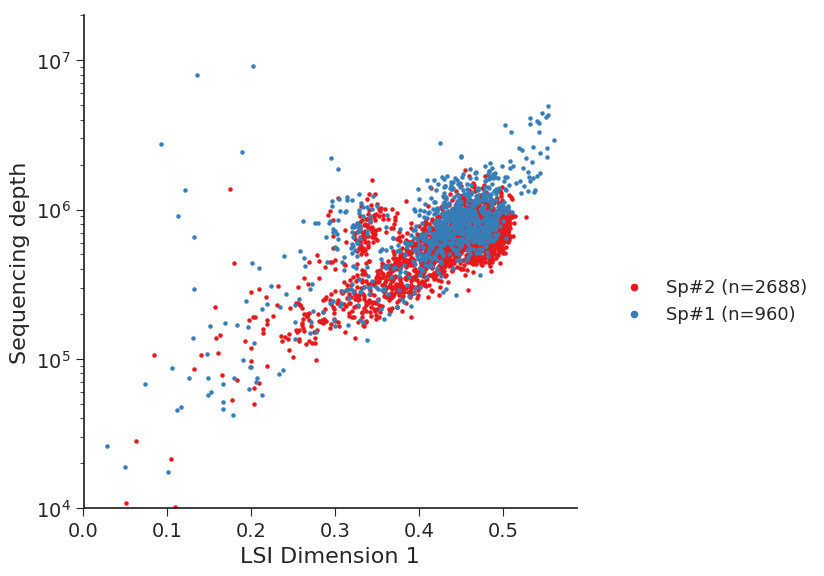

In [38]:
# have a look the first dimension and the sequencing depth

g = sns.FacetGrid(plate_qc, hue='batch', size=6)
g.map(plt.scatter, 'LSI Dimension 1', 'sequencing_depth', s=5)
g.ax.legend(bbox_to_anchor=[1.5, .5])
g.ax.set_yscale('log')
g.ax.set_ylim(1e4, 2e7)
g.ax.set_ylabel('Sequencing depth')

plt.savefig('figures/LSI_1st_dimension_vs_sequencing_depth.pdf',
            bbox_inches='tight', transparent=True)

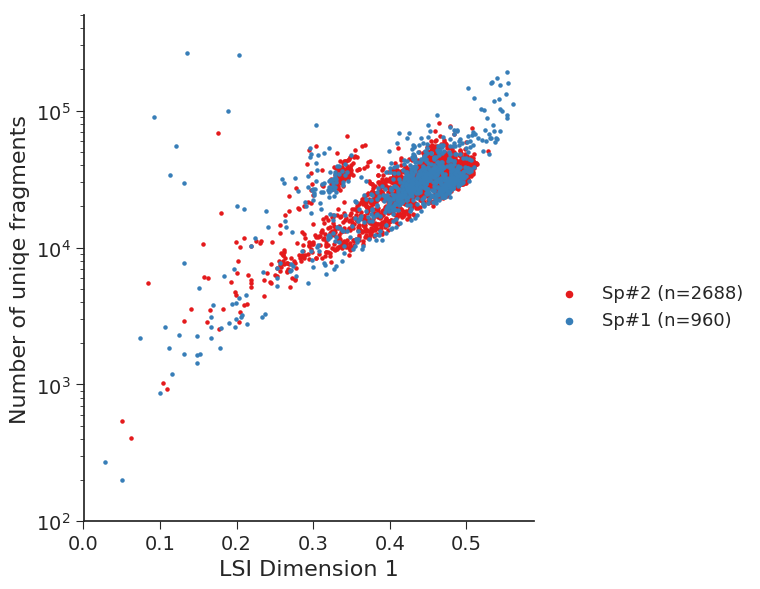

In [39]:
# have a look the first dimension and the uniq frags

g = sns.FacetGrid(plate_qc, hue='batch', size=6)
g.map(plt.scatter, 'LSI Dimension 1', 'uniq_frags', s=5)
g.ax.legend(bbox_to_anchor=[1.5, .5])
g.ax.set_yscale('log')
g.ax.set_ylim(1e2, 5e5)
g.ax.set_ylabel('Number of uniqe fragments')

plt.savefig('figures/LSI_1st_dimension_vs_uniq_frags.pdf',
            bbox_inches='tight', transparent=True)

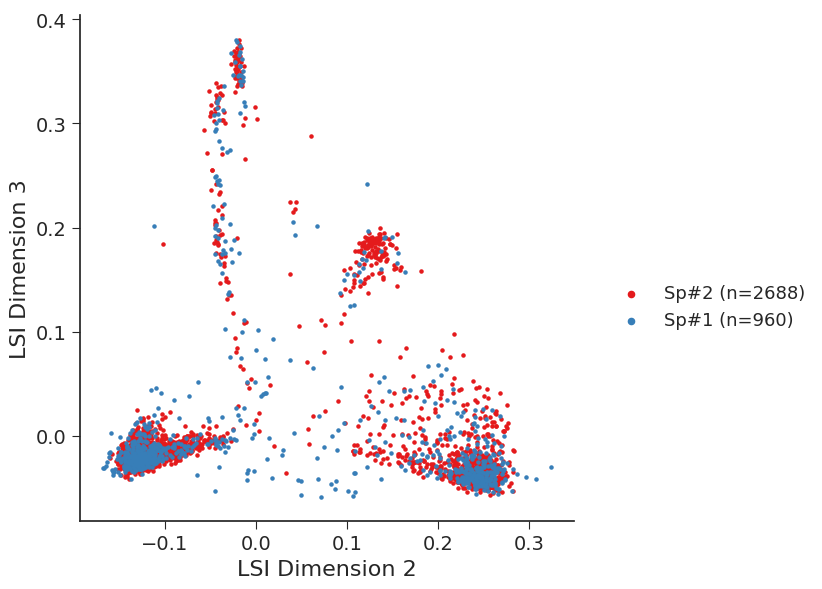

In [40]:
g = sns.FacetGrid(plate_qc, hue='batch', size=6)
g.map(plt.scatter, 'LSI Dimension 2', 'LSI Dimension 3', s=5)
g.ax.legend(bbox_to_anchor=[1.5, .5])

In [41]:
# check peaks linked to some marker genes (by annotatePeaks.pl from the HOMER suite)

homer = pd.read_table('cmp_to_immgen/homer_annotation_spleen_union_peaks_no_black_list.txt', index_col=0)
marker_genes = ['Bcl11a', 'Bcl11b', 'Cd3e', 'Cd4',
                'Cd8a', 'Cd19', 'Ms4a1', 'Ebf1',
                'Tcf7', 'Gzma', 'Lrg1']

marker_p2g = homer[homer['Gene Name'].isin(marker_genes)]['Gene Name']
marker_count = pd.concat([sc_count, marker_p2g], axis=1, join='inner')
marker_count.head(2)

,mSp_rep7_276,mSp_rep7_267,mSp_rep7_325,mSp_rep7_270,mSp_rep7_092,mSp_rep7_291,mSp_rep7_196,mSp_rep7_347,mSp_rep7_141,mSp_rep7_079,...,mSp_rep6_110,mSp_rep6_353,mSp_rep6_174,mSp_rep6_255,mSp_rep6_250,mSp_rep6_280,mSp_rep6_046,mSp_rep6_302,mSp_rep6_019,Gene Name
spleen_uPk_17545,0,0,0,0,0,2,0,6,0,0,...,4,0,0,0,0,4,0,7,0,Bcl11a
spleen_uPk_17546,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,Bcl11a


In [42]:
marker_sum = marker_count.groupby('Gene Name').sum()
marker_sum

,mSp_rep7_276,mSp_rep7_267,mSp_rep7_325,mSp_rep7_270,mSp_rep7_092,mSp_rep7_291,mSp_rep7_196,mSp_rep7_347,mSp_rep7_141,mSp_rep7_079,...,mSp_rep6_216,mSp_rep6_110,mSp_rep6_353,mSp_rep6_174,mSp_rep6_255,mSp_rep6_250,mSp_rep6_280,mSp_rep6_046,mSp_rep6_302,mSp_rep6_019
Gene Name,,,,,,,,,,,,,,,,,,,,,
Bcl11a,5,21,4,0,6,35,0,32,4,0,...,3,42,16,9,4,0,30,0,42,2
Bcl11b,17,0,0,11,0,0,18,0,0,30,...,0,0,0,0,18,15,0,8,0,15
Cd19,0,2,2,0,4,5,0,5,0,0,...,0,8,2,0,0,0,12,0,6,0
Cd3e,10,0,0,4,0,2,2,2,0,6,...,0,0,0,0,5,0,0,0,0,0
Cd4,2,2,0,0,0,0,9,0,0,2,...,0,0,1,0,0,0,0,1,0,2
Cd8a,13,0,0,12,0,0,1,0,0,0,...,0,0,0,0,4,0,0,0,0,6
Ebf1,0,11,2,0,0,40,0,18,4,0,...,2,16,3,0,0,0,37,0,16,0
Gzma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lrg1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
for g in marker_genes:
    plate_qc[g] = marker_sum.loc[g]

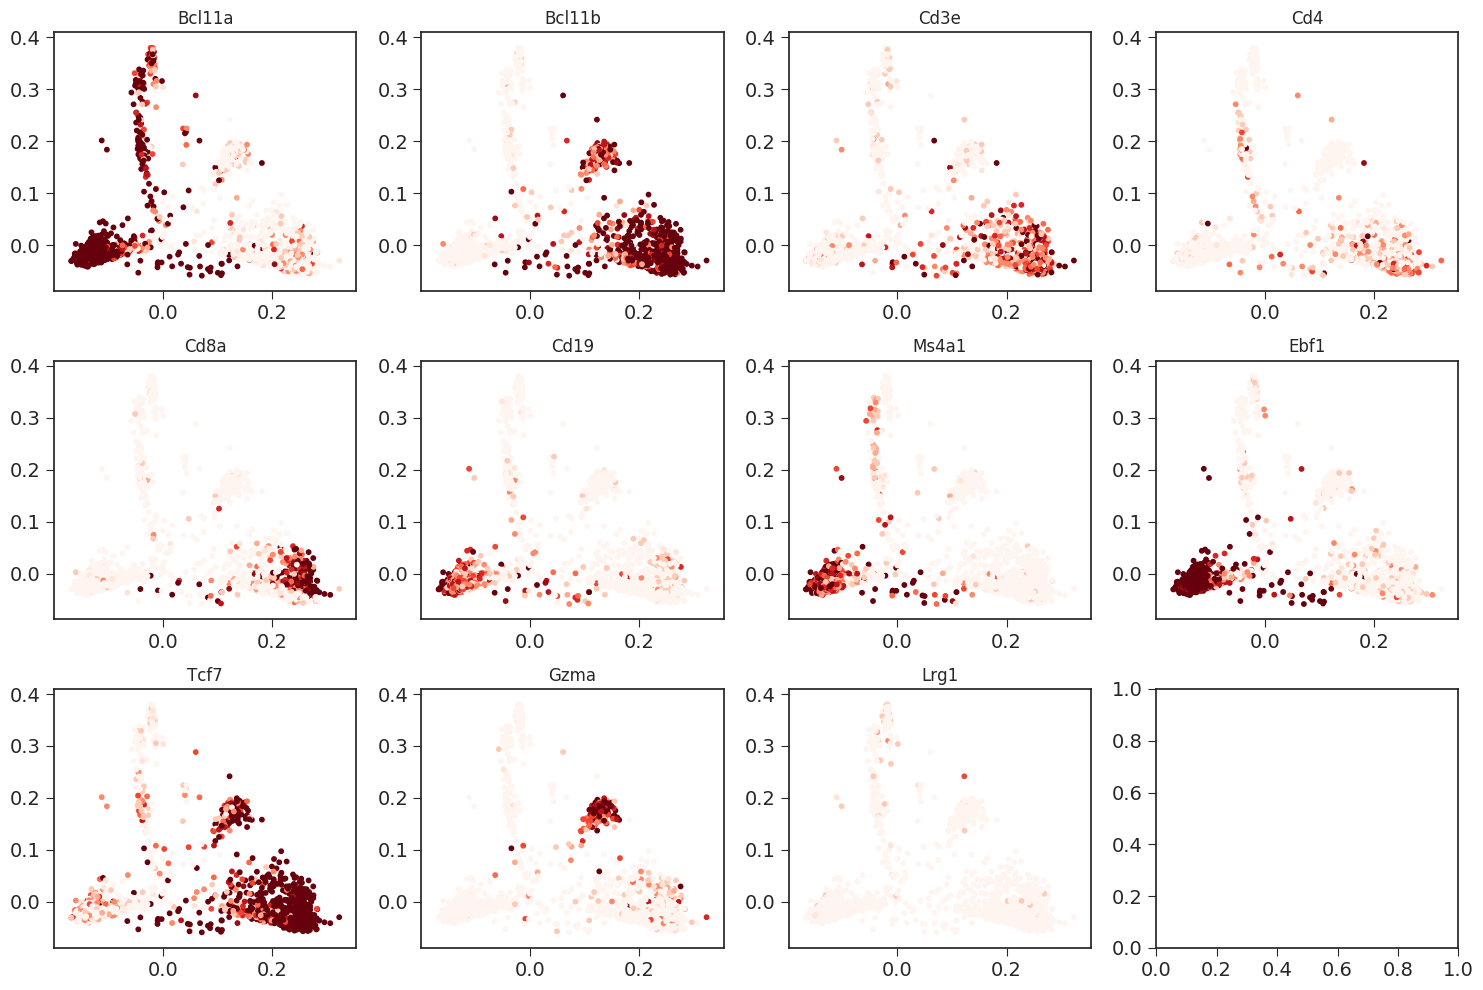

In [44]:
fig, ax = plt.subplots(figsize=(15, 10), ncols=4, nrows=3)
ax = ax.flatten()

for i, j in enumerate(marker_genes):
    ax[i].scatter(plate_qc['LSI Dimension 2'], plate_qc['LSI Dimension 3'],
                  cmap='Reds', c=plate_qc[j], vmin=0, vmax=10, s=10)
    ax[i].set_title(j, fontsize=12)

plt.tight_layout()
plt.show()

(0.5, 2.5)

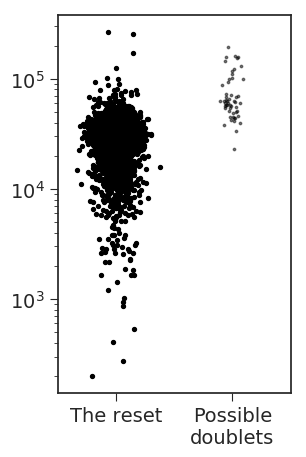

In [45]:
# some cells showed high counts around both T-cell and B-cell markers
# these are possible doublets
# if this is the case, they might have more reads/fragments than the others

tcf7_high = marker_sum.columns[marker_sum.loc['Tcf7'] > 10]
ebf1_high = marker_sum.columns[marker_sum.loc['Ebf1'] > 10]
bcl11a_high = marker_sum.columns[marker_sum.loc['Bcl11a'] > 10]
bcl11b_high = marker_sum.columns[marker_sum.loc['Bcl11b'] > 10]

dbs1 = (set(tcf7_high) & set(ebf1_high))
dbs2 = (set(bcl11a_high) & set(bcl11b_high))
dbs = dbs1 | dbs2

fig, ax = plt.subplots(figsize=(3,5))

offset1 = np.random.normal(scale=0.1, size=plate_qc.drop(labels=dbs).shape[0])
ax.scatter(1 + offset1, plate_qc.drop(labels=dbs).uniq_frags, s=8, c='k')

offset2 = np.random.normal(scale=0.05, size=len(dbs))
ax.scatter(2 + offset2, plate_qc.loc[dbs].uniq_frags, s=3, c='k', alpha=.5)
ax.set_yscale('log')

ax.set_xticks(range(1,3))
ax.set_xticklabels(['The reset', 'Possible\ndoublets'])
ax.set_xlim(0.5,2.5)

In [46]:
len(dbs)

53

In [47]:
plate_qc.loc[dbs].to_csv('mSp_scATAC-seq/qc_possible_doublets.csv')

In [48]:
plate_qc.drop(labels=dbs, inplace=True)

# Generate some other experimental figures

In [7]:
# get the size - migration time of the ladder from bioanalzyer trace

ladder_info = pd.read_csv('bioanalyzer_results/Ladder.csv', encoding = 'ISO-8859-1')
ladder_info.head(2)

,Size [bp],Conc. [pg/µl],Molarity [pmol/l],Observations,Area,Aligned Migration Time [s],Peak Height,Peak Width,% of Total,Time corrected area
0,35,125,"5,411.30",Lower Marker,160.3,43.00,98.1,1.1,0,160.3
1,50,150,"4,545.50",Ladder Peak,210.2,45.31,139.0,1.8,0,210.2


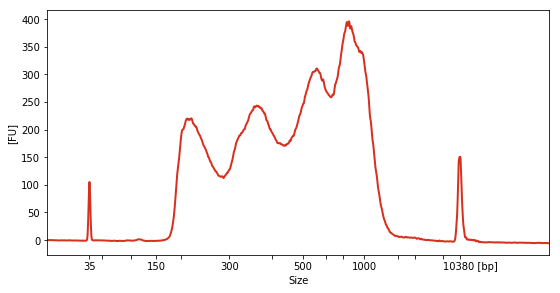

In [8]:
# plot bioanlayzer traces of each library

fig, ax = plt.subplots(figsize=(9,4.5))

samples = iglob('bioanalyzer_results/Rep*.csv')

for s in samples:
    ax.cla()
    sn = s.split('/')[-1][:-4]
    df = pd.read_csv(s, skiprows=17)
    df = df.iloc[:-1,:]
    df = df.astype(float)
    ax.plot(df.Time, df.Value, color='#d7301f', lw=2.)
    ax.set_xticks(ladder_info['Aligned Migration Time [s]'])
    ax.set_xticklabels(['35', '', '', '150', '', '300', '', '500', '', '',
                        '1000', '', '', '', '       10380 [bp]'])
    ax.set_xlim(35, 130)
    ax.set_xlabel("Size")
    ax.set_ylabel('[FU]')
    plt.savefig('figures/{}_bioanlayzer.pdf'.format(sn), bbox_inches='tight', transparent=True)